In [2]:
!pip3 install pymc
!pip3 install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
%matplotlib inline
import pymc as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import arviz as az

%config InlineBackend.figure_format = 'retina'
#plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Code 4.1

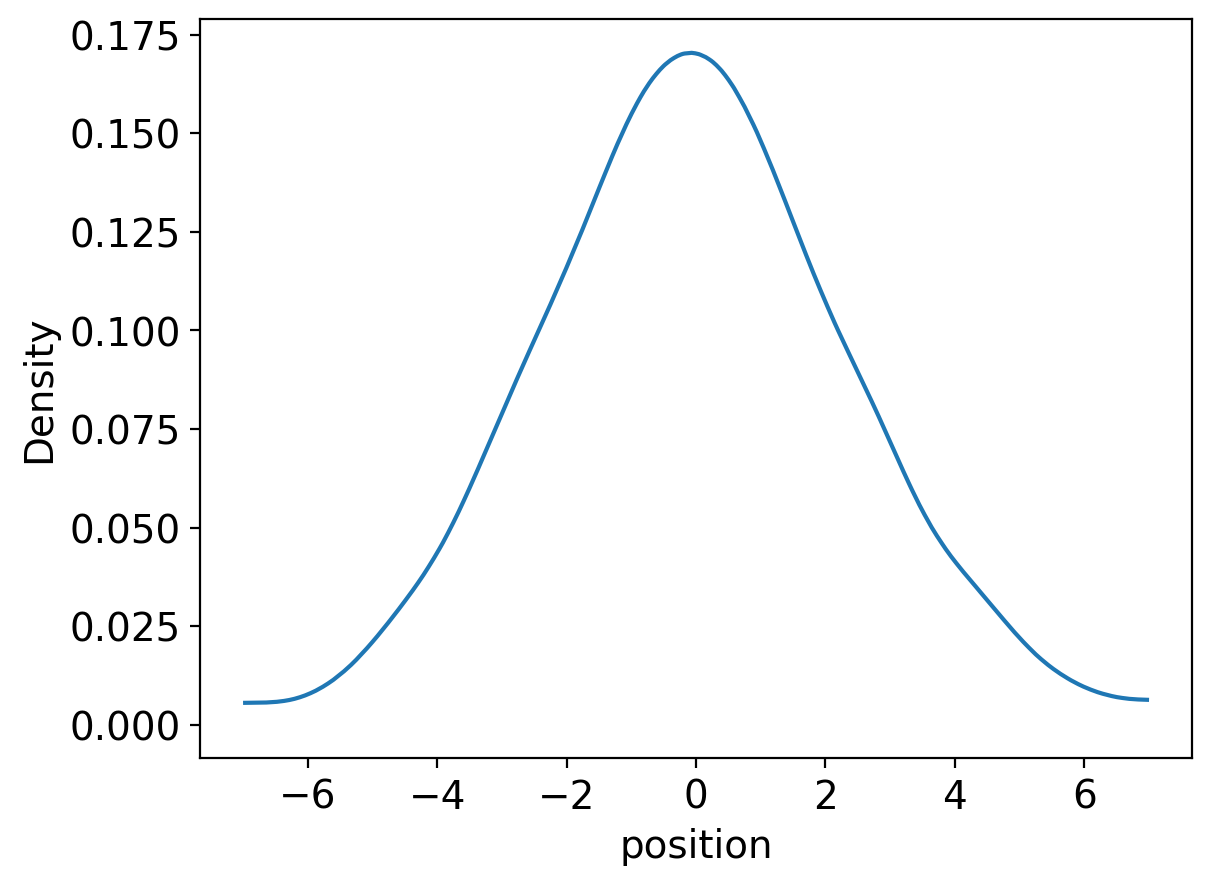

In [4]:
pos = np.random.uniform(-1, 1, size=(16, 1000)).sum(0)
az.plot_kde(pos)
plt.xlabel('position', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 4.2 and 4.3

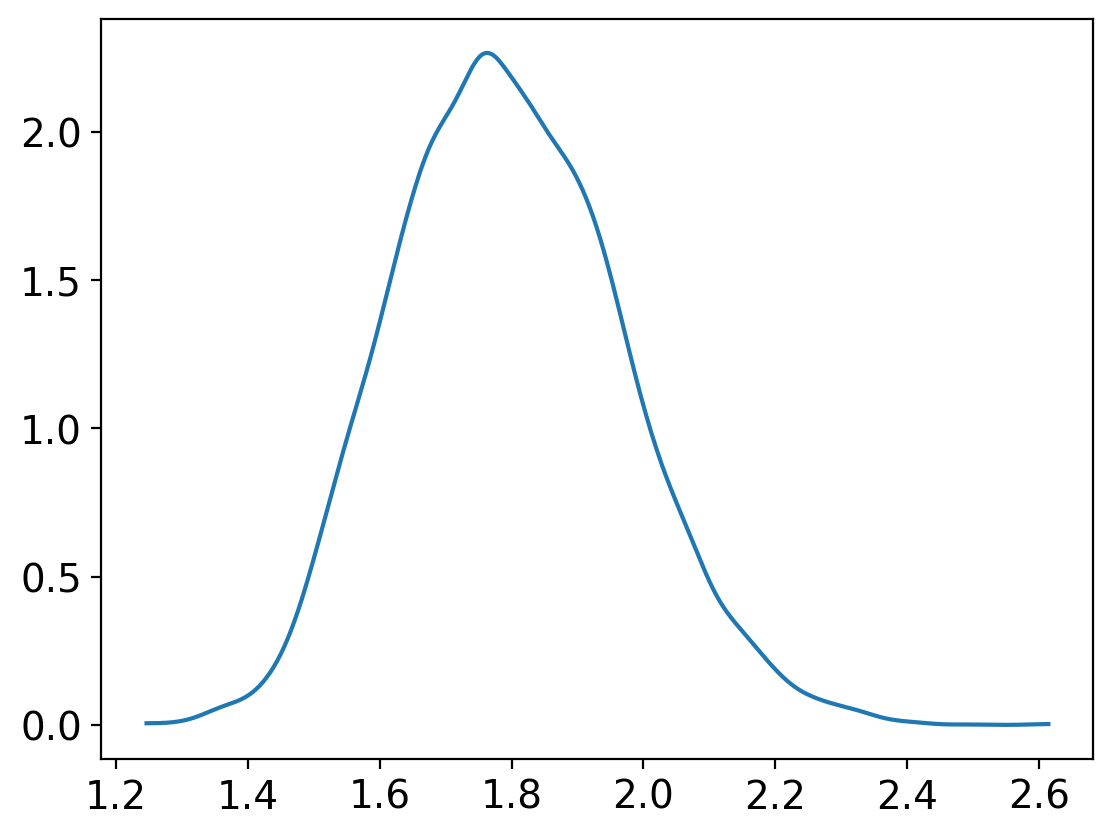

In [5]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
az.plot_kde(pos);

#### Code 4.4

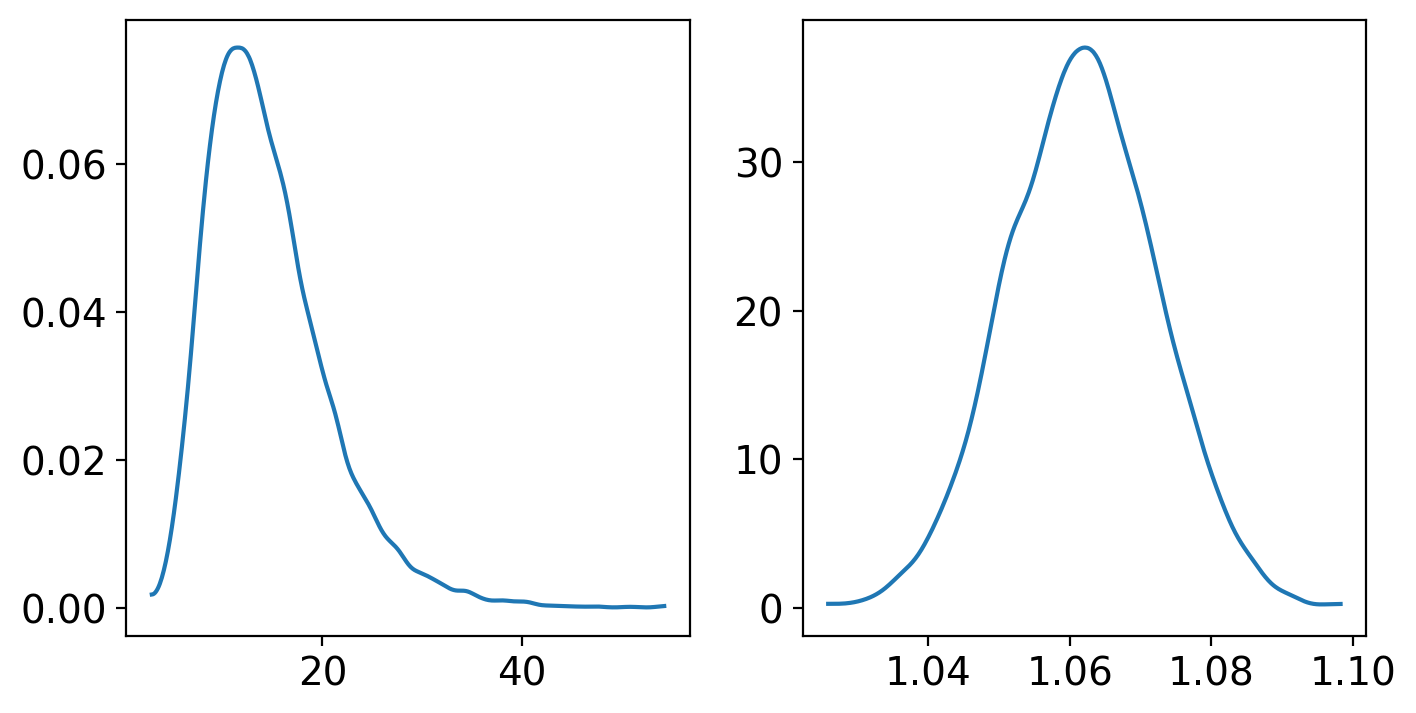

In [6]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0)
_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(big, ax=ax[0])
az.plot_kde(small, ax=ax[1]);

#### Code 4.5

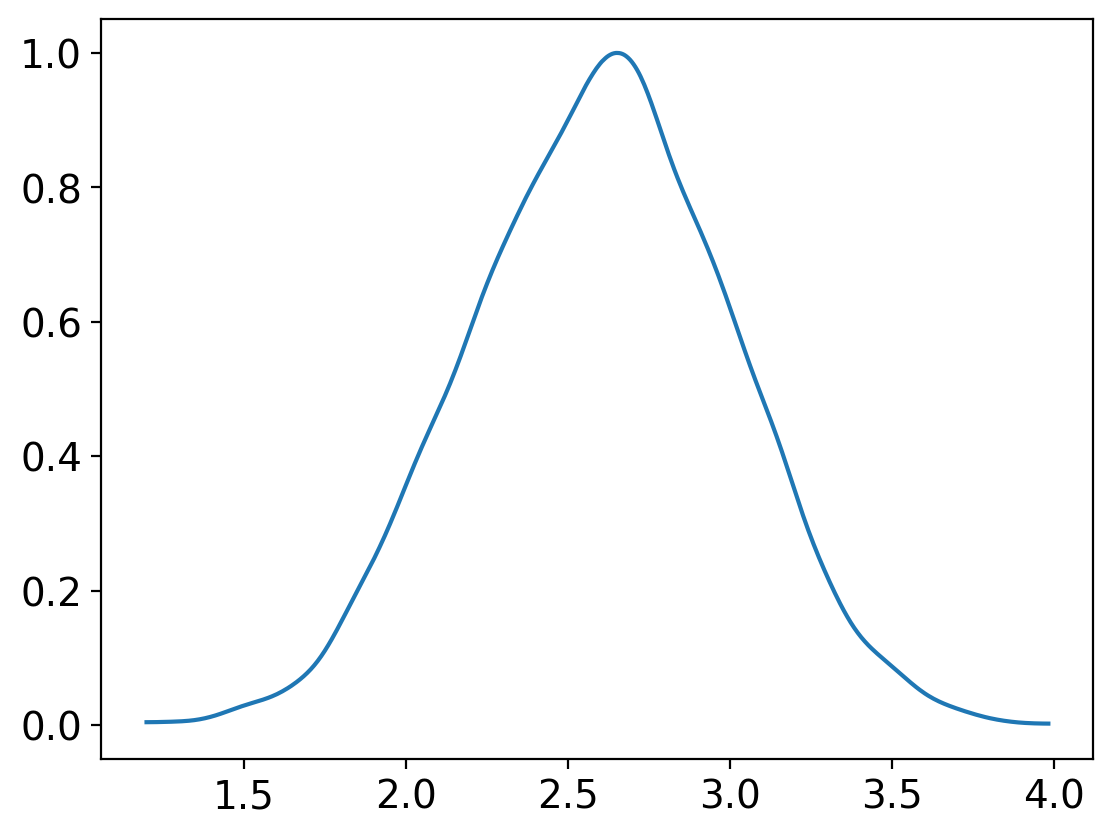

In [7]:
log_big = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
az.plot_kde(log_big);

#### Code 4.6

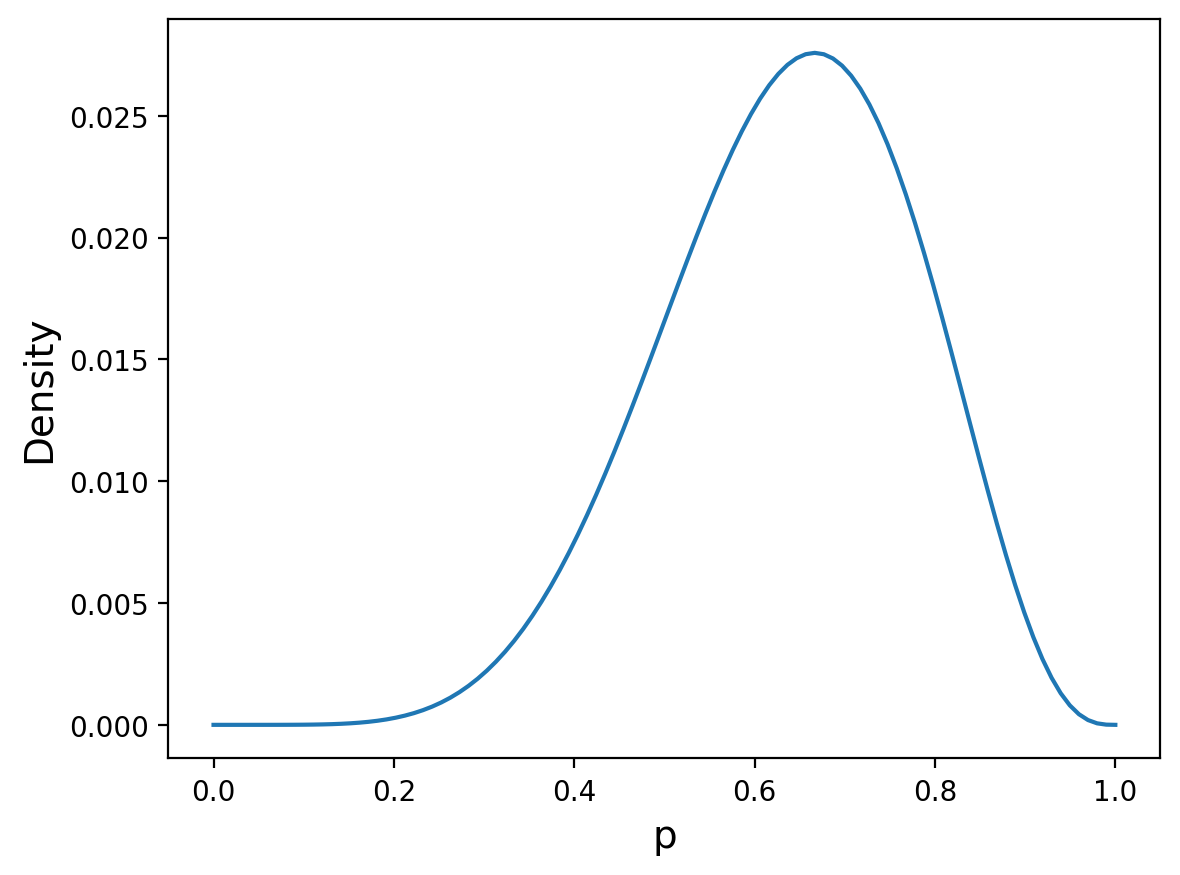

In [8]:
w, n = 6, 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(k=w, n=n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior / (posterior).sum()
plt.plot(p_grid, posterior)
plt.xlabel('p', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 4.7 and 4.8

In [9]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0

#### Code 4.9

In [10]:
d.height.head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

#### Code 4.10

In [11]:
d2 = d[d.age >= 18]

#### Code 4.11

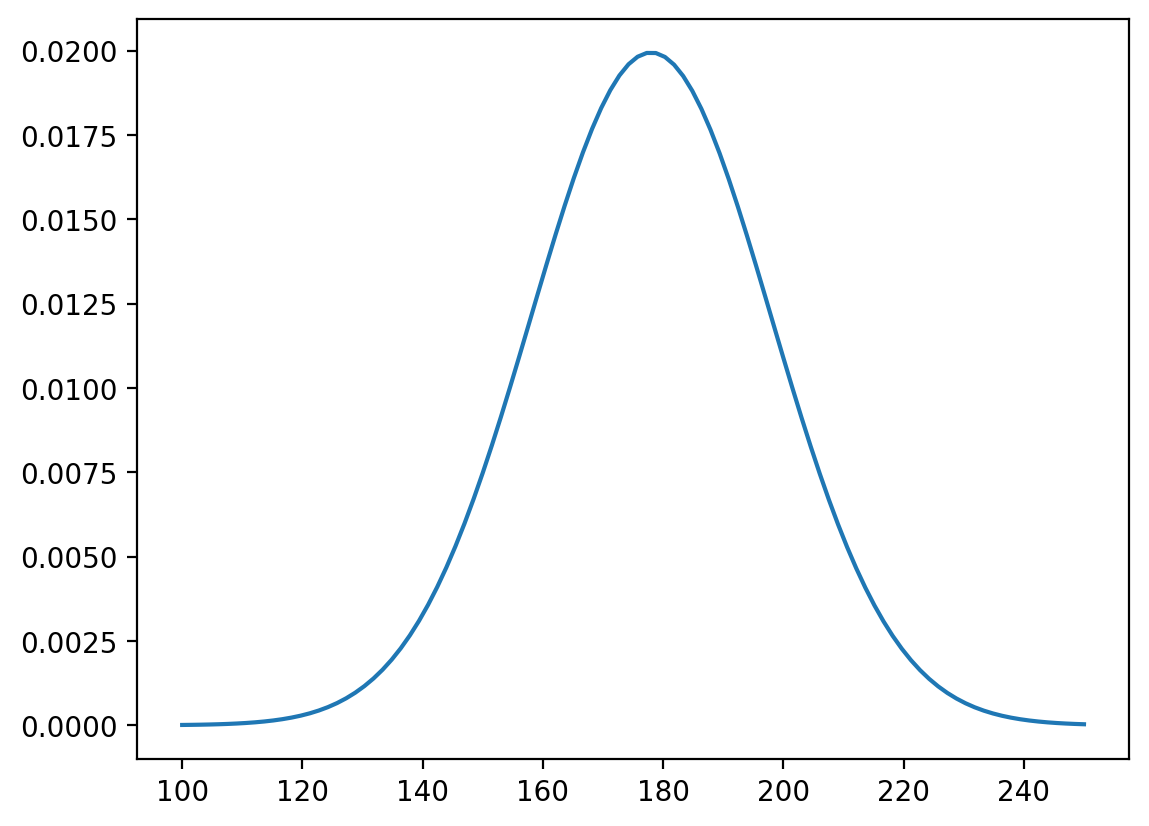

In [12]:
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20));

#### Code 4.12

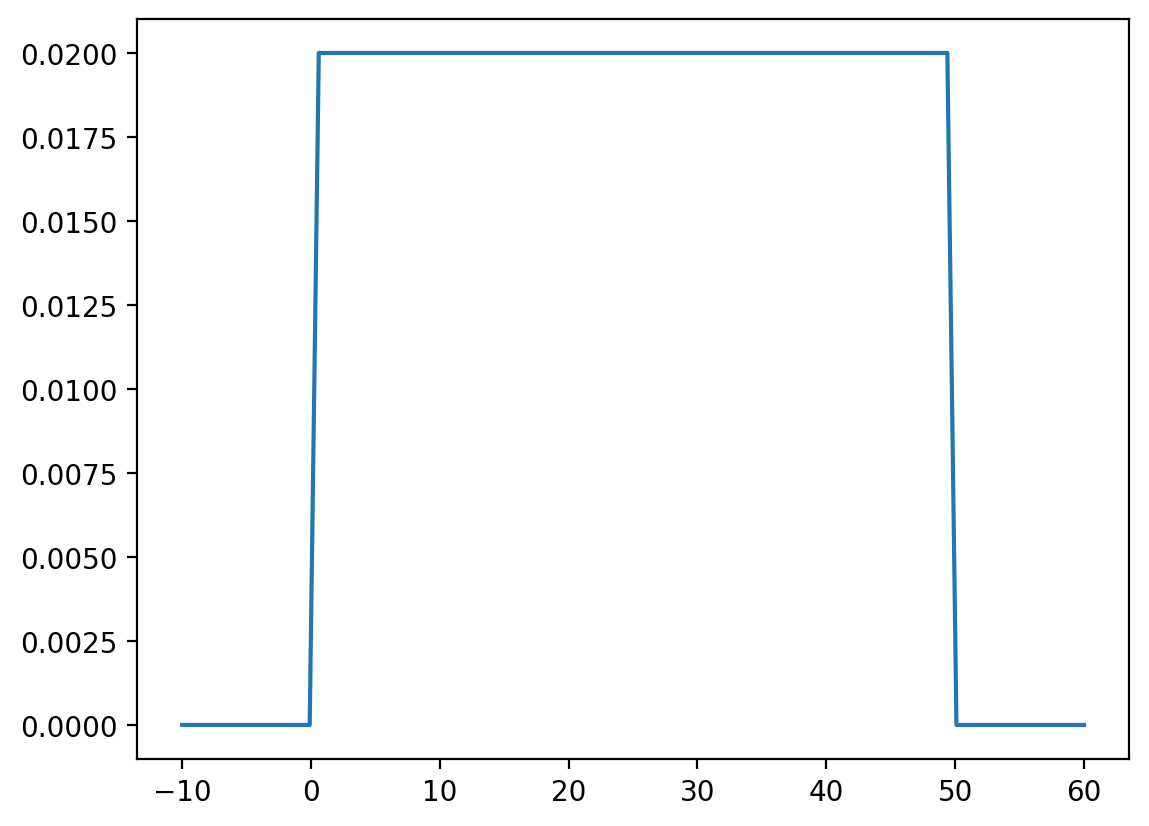

In [13]:
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50));

#### Code 4.14

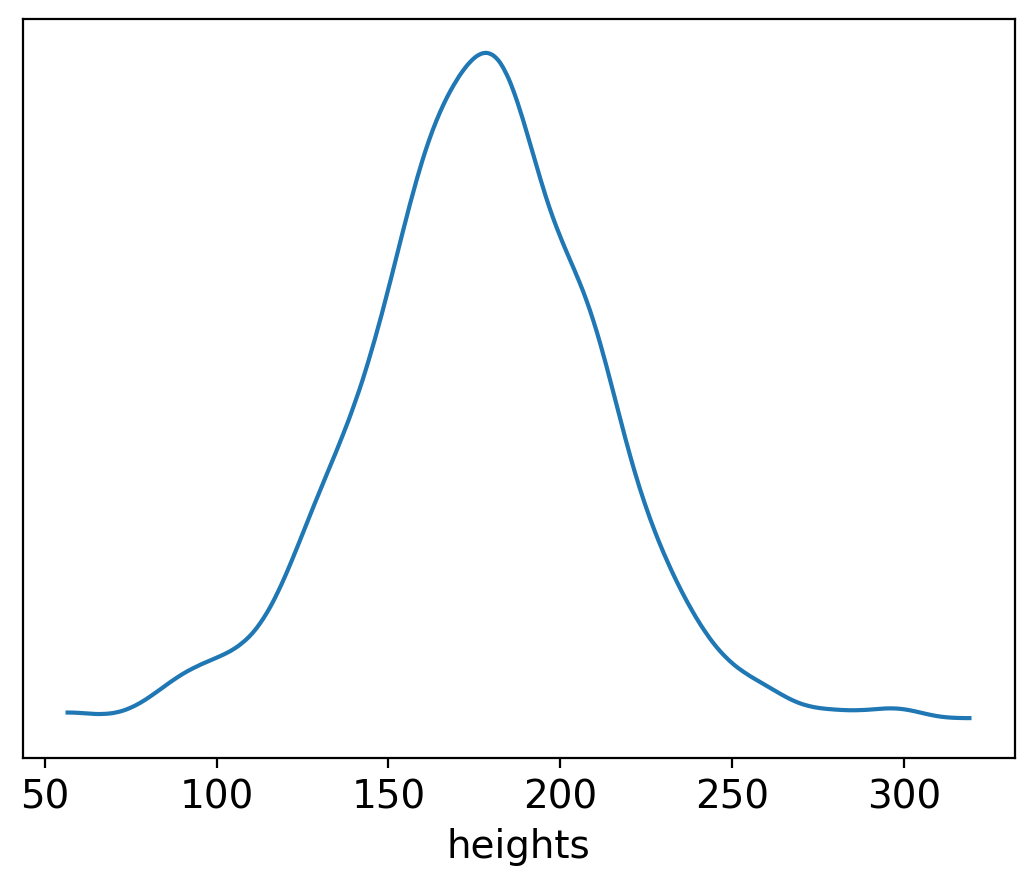

In [14]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
az.plot_kde(prior_h)
plt.xlabel('heights', fontsize=14)
plt.yticks([]);

#### Code 4.15

TypeError: contour() takes from 1 to 4 positional arguments but 0 were given

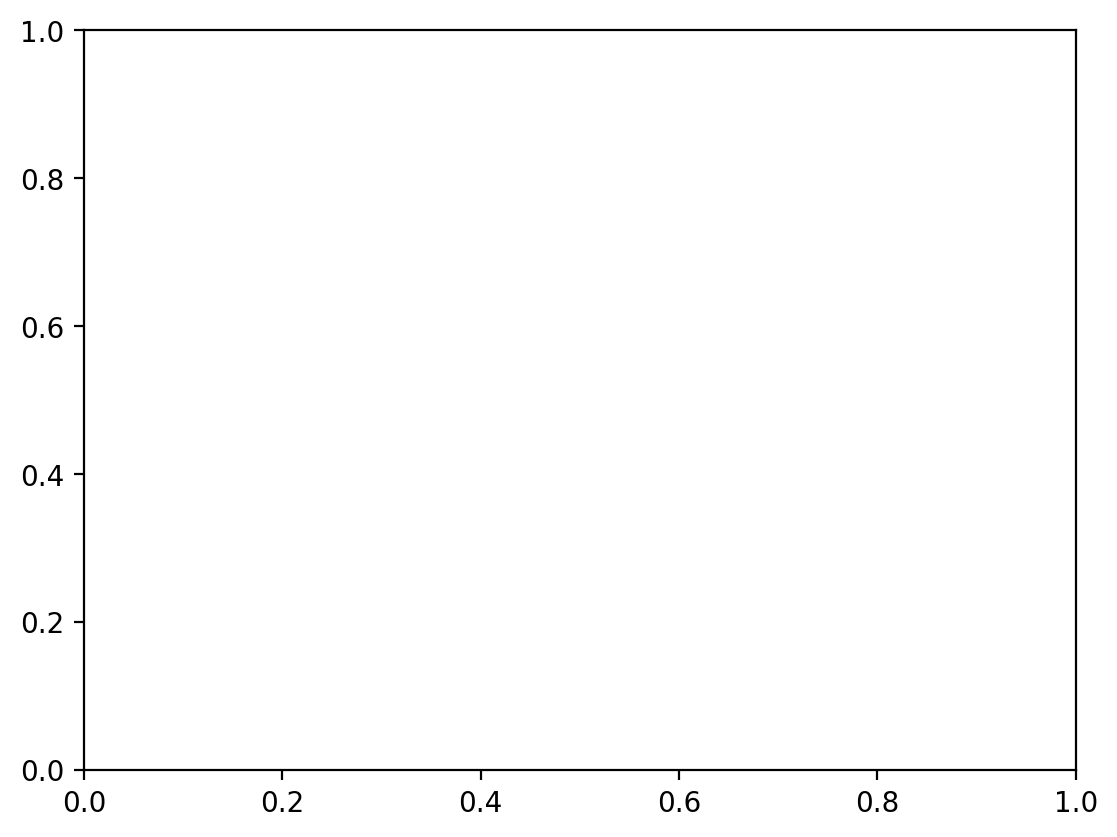

In [15]:
post = np.mgrid[150:160:0.1, 7:9:0.1].reshape(2,-1).T

likelihood = [sum(stats.norm.logpdf(d2.height, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]

post_prod = (likelihood + 
             stats.norm.logpdf(post[:,0], loc=178, scale=20) + 
             stats.uniform.logpdf(post[:,1], loc=0, scale=50))
post_prob = np.exp(post_prod - max(post_prod))

plt.contour()

#### Code 4.15 and 4.16

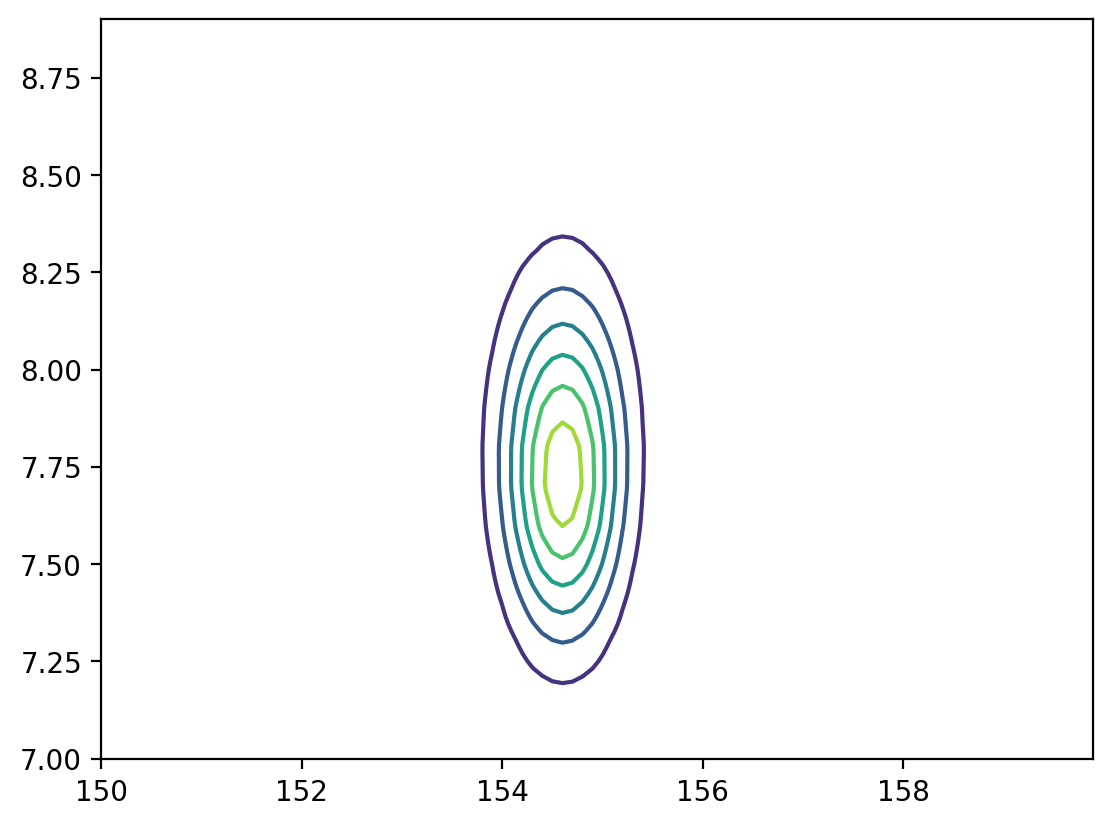

In [ ]:
xi = np.linspace(post[:,0].min(), post[:,0].max(), 100)
yi = np.linspace(post[:,1].min(), post[:,1].max(), 100)
zi = griddata((post[:,0], post[:,1]), post_prob, (xi[None,:], yi[:,None]))

plt.contour(xi, yi, zi);

#### Code 4.17 and 4.18

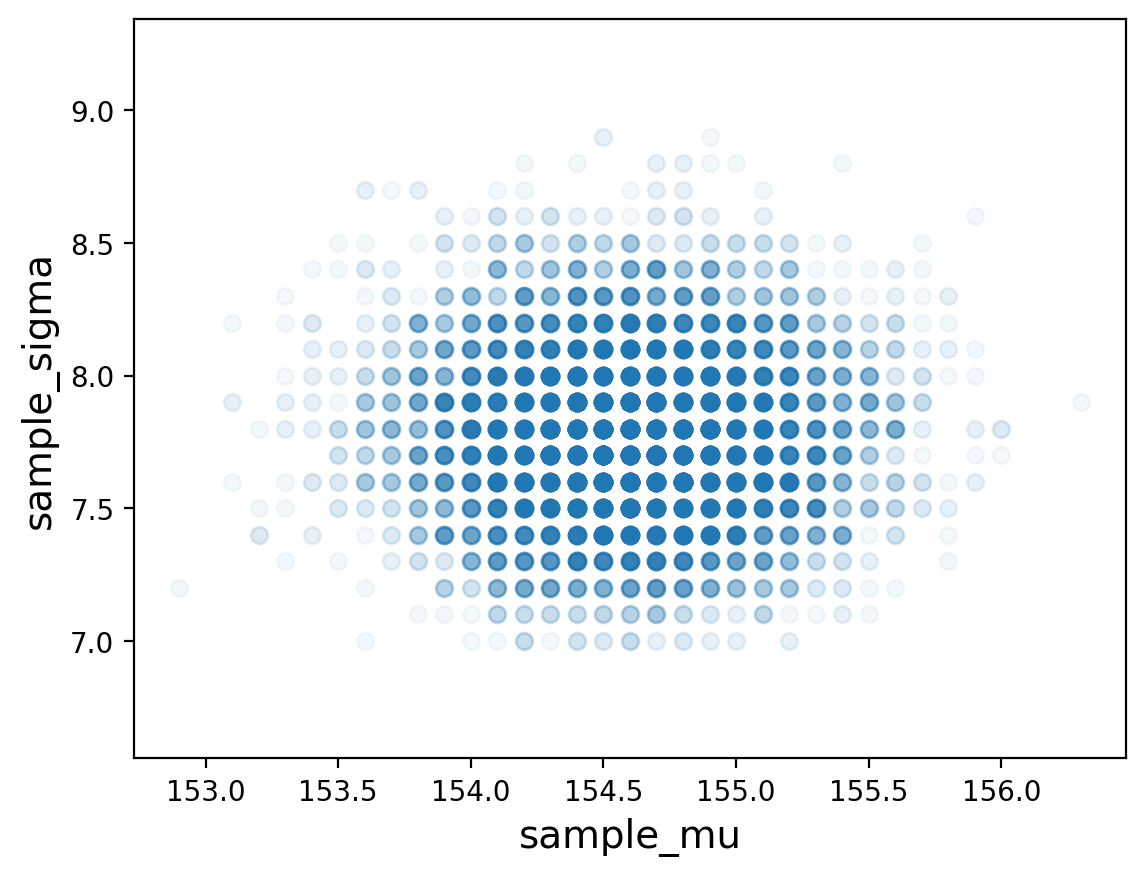

In [ ]:
sample_rows = np.random.choice(np.arange(len(post)), size=10000, replace=True, 
                               p=(post_prob/post_prob.sum()))
sample_mu = post[:,0][sample_rows]
sample_sigma = post[:,1][sample_rows]

plt.plot(sample_mu, sample_sigma, 'o', alpha=0.05)
plt.axis('equal')
plt.grid(False)
plt.xlabel('sample_mu', fontsize=14)
plt.ylabel('sample_sigma', fontsize=14);

#### Code 4.19

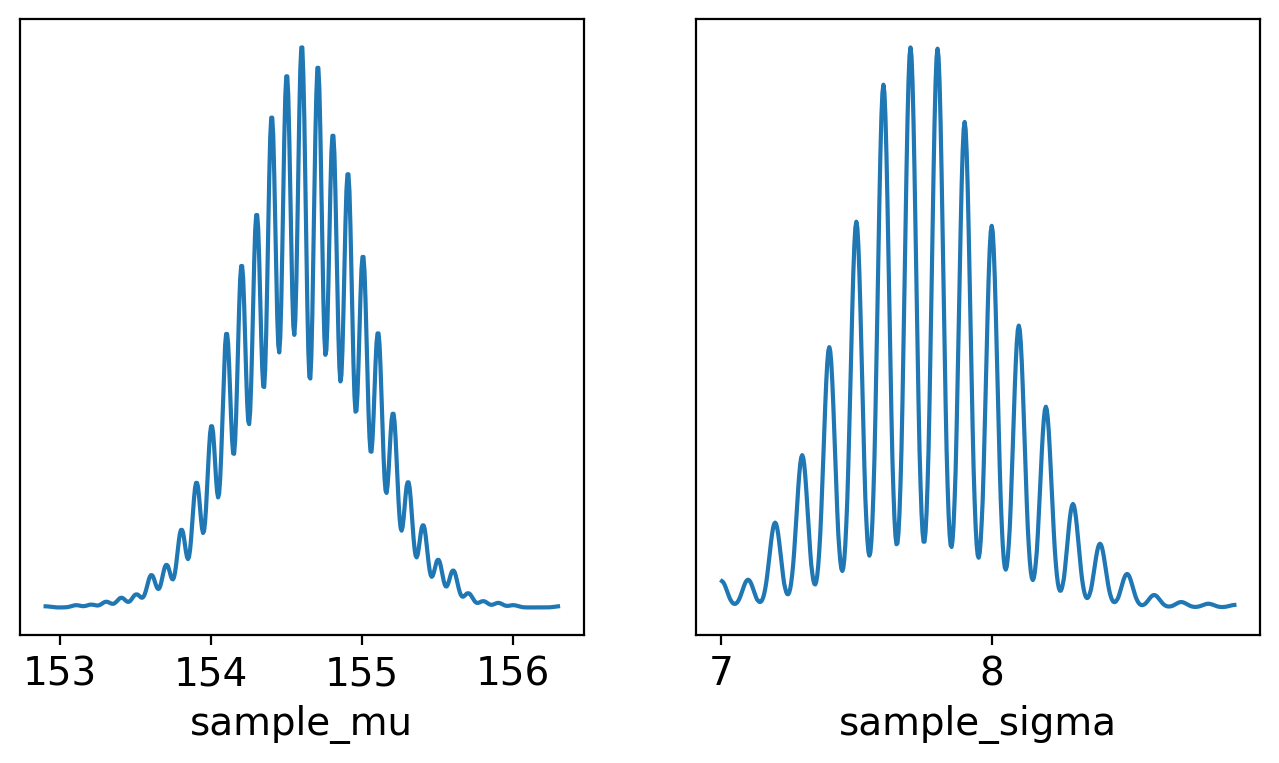

In [ ]:
_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(sample_mu, ax=ax[0])
ax[0].set_xlabel('sample_mu', fontsize=14)
ax[0].set_yticks([])
az.plot_kde(sample_sigma, ax=ax[1])
ax[1].set_xlabel('sample_sigma', fontsize=14)
ax[1].set_yticks([]);

#### Code 4.20

In [ ]:
az.hdi(sample_mu), az.hdi(sample_sigma)

(array([153.8, 155.3]), array([7.3, 8.3]))

#### Code 4.21 and  4.22

In [ ]:
d3 = np.random.choice(d2.height, 20)
post2 = np.mgrid[150:170:0.1, 4:20:0.1].reshape(2,-1).T

likelihood2 = [sum(stats.norm.logpdf(d3, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]

post_prod2 = (likelihood + 
              stats.norm.logpdf(post[:,0], loc=178, scale=20) + 
              stats.uniform.logpdf(post[:,1], loc=0, scale=50))

post_prob2 = np.exp(post_prod - max(post_prod))

sample_rows2 = np.random.choice(np.arange(len(post)), size=10000, replace=True, 
                               p=(post_prob/post_prob.sum()))
sample_mu2 = post[:,0][sample_rows]
sample_sigma2 = post[:,1][sample_rows]

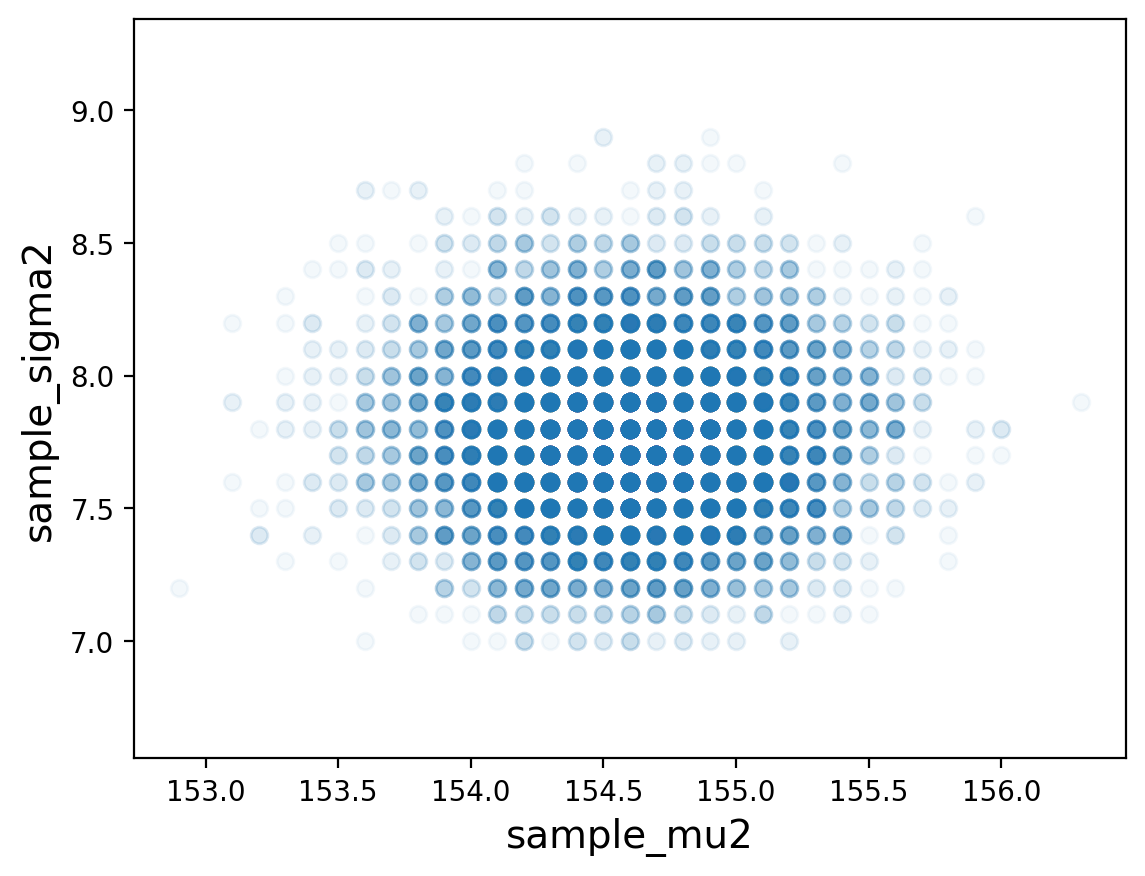

In [ ]:
plt.plot(sample_mu2, sample_sigma2, 'o', alpha=0.05)
plt.axis('equal')
plt.xlabel('sample_mu2', fontsize=14)
plt.ylabel('sample_sigma2', fontsize=14)
plt.grid(False)

#### Code 4.23

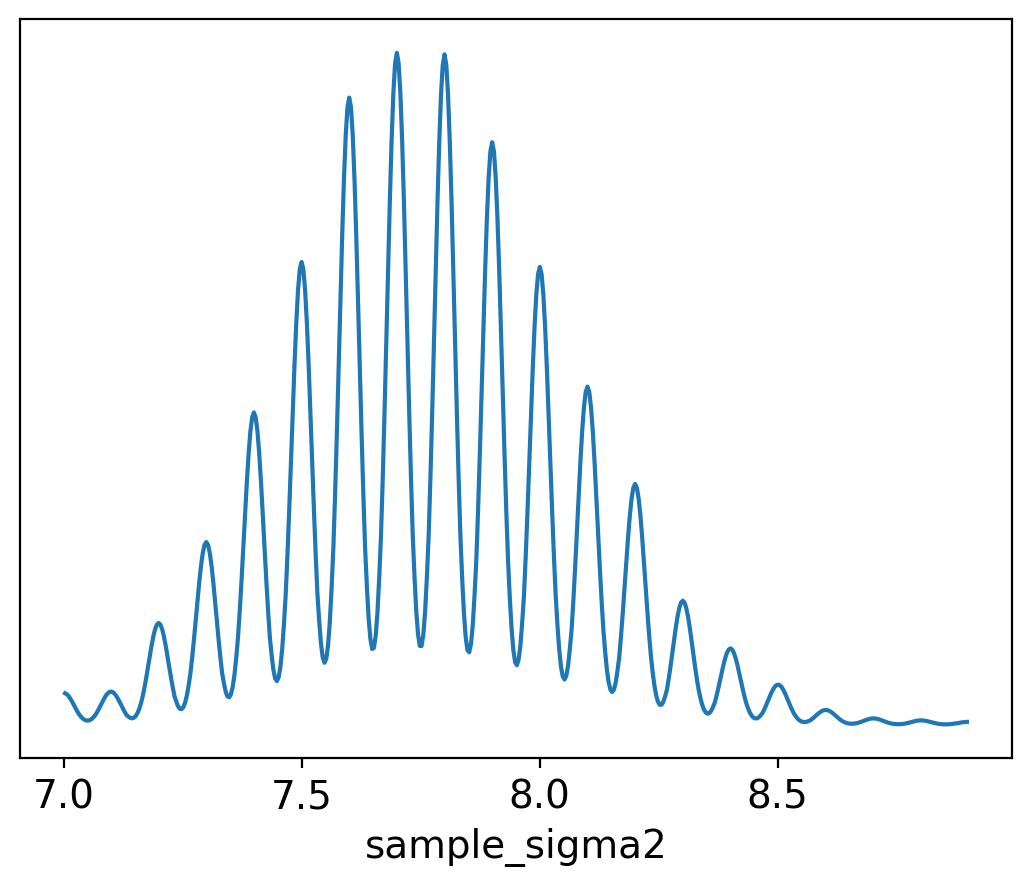

In [ ]:
az.plot_kde(sample_sigma2)
plt.xlabel('sample_sigma2', fontsize=14)
plt.yticks([]);

#### Code 4.24

We are repeating code 4.7, 4.8 and 4.10

In [ ]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]

#### Code 4.25

In [ ]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)

#### Code 4.26

We could use a quadratic approximation like McElreath does in his book and we did in code 2.6. But Using PyMC3 is really simple to just sample from the model using a "sampler method". Most common sampler methods are members of the Markov Chain Monte Carlo Method (MCMC) family (for details read Section 2.4.3 and Chapter 8 of Statistical Rethinking).

PyMC3 comes with various sampler. Some sampler are more suited than others for certain type of variable (and/or problems). For now we are going to let PyMC3 choose the sampler for us. PyMC3 also tries to provide a reasonable starting point for the simulation. By default PyMC3 uses the same adaptive procedure as in STAN `'jitter+adapt_diag'`, which start with a identity mass matrix and then adapt a diagonal based on the variance of the tuning samples. 

You can read more details of PyMC3 [here](http://pymc-devs.github.io/pymc3/notebooks/getting_started.html)

In [ ]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


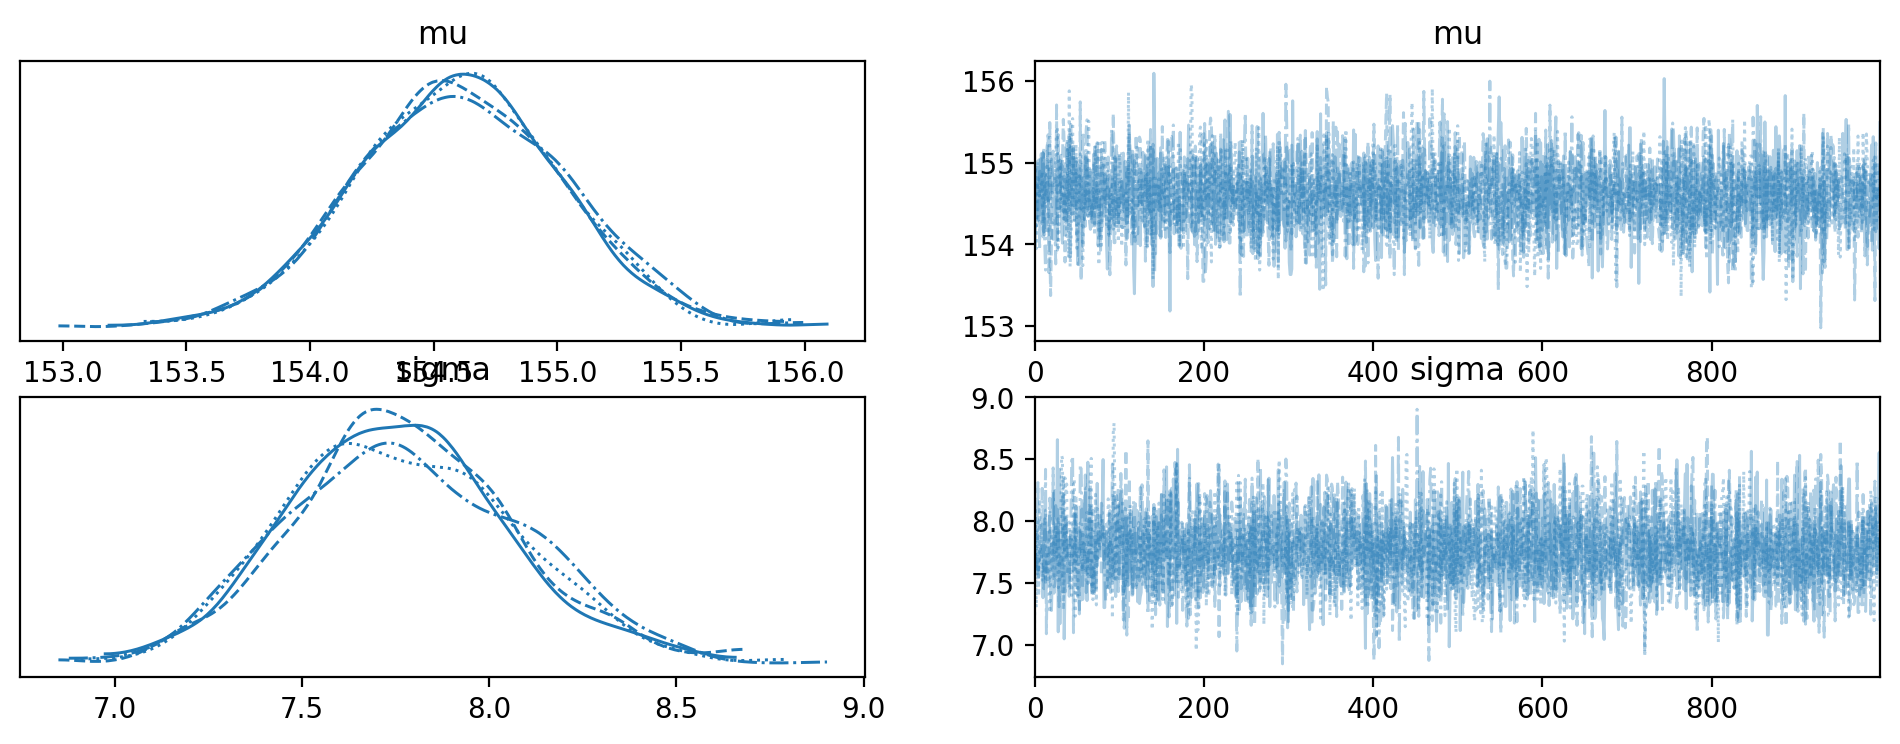

In [ ]:
az.plot_trace(trace_4_1); # this function let you check the samples values

#### Code 4.27

Notice that compared to the table in the book we have an extra column, "mc_error". Since we are sampling from the posterior, there is an error introducing by the sampling process. This error can be reduced by taking more samples.

In [ ]:
pm.summary(trace_4_1, hdi_prob= .89).round(2)

mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     154.60  0.42    153.94     155.26       0.01      0.0    4232.0   
sigma    7.77  0.30      7.28       8.23       0.00      0.0    4268.0   

       ess_tail  r_hat  
mu       3294.0    1.0  
sigma    2923.0    1.0

#### Code 4.28

In [ ]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sigma=20, testval=d2.height.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2.height.std())
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_1 = pm.sample(1000, tune=1000)

/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_875/3369794411.py:2: FutureWarning: The `testval` argument is deprecated; use `initval`.
  mu = pm.Normal('mu', mu=178, sigma=20, testval=d2.height.mean())
/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_875/3369794411.py:3: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2.height.std())
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


mean   sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     154.61  0.4    154.01     155.28       0.01      0.0    4021.0   
sigma    7.77  0.3      7.28       8.22       0.00      0.0    3853.0   

       ess_tail  r_hat  
mu       3020.0    1.0  
sigma    2673.0    1.0

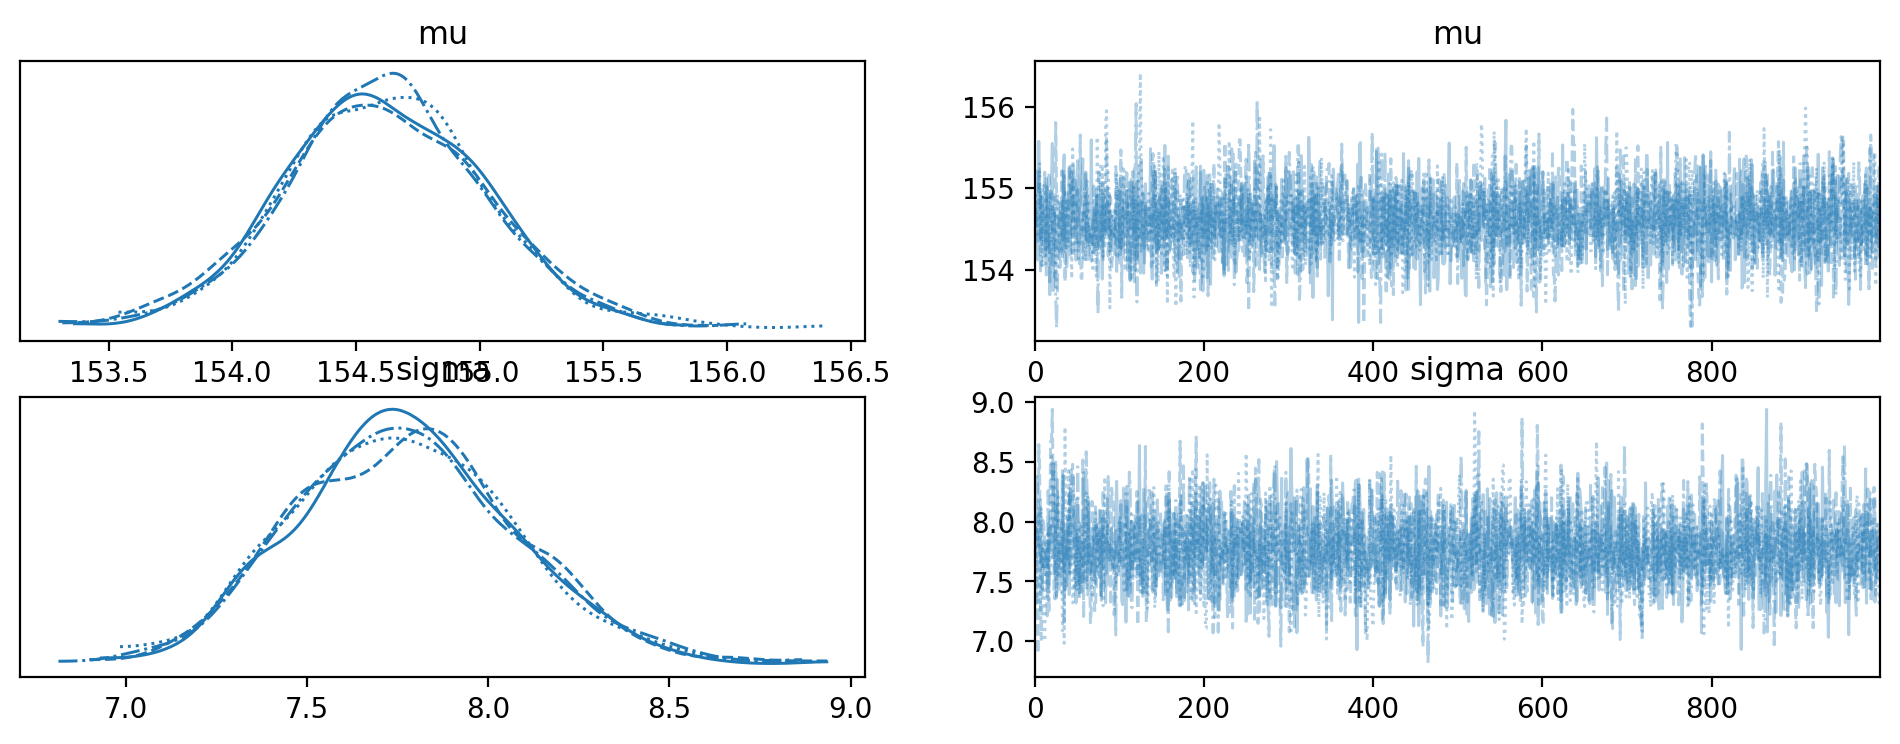

In [ ]:
pm.plot_trace(trace_4_1); 
pm.summary(trace_4_1, hdi_prob = .89).round(2)

#### Code 4.29

In [ ]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sigma=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


In [ ]:
pm.summary(trace_4_2, hdi_prob = .89).round(2)

mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     177.86  0.10    177.70     178.02       0.00     0.00    3807.0   
sigma   24.60  0.94     23.12      26.09       0.02     0.01    4000.0   

       ess_tail  r_hat  
mu       3167.0    1.0  
sigma    2956.0    1.0

#### Code 4.30

For some computations could be nice to have the trace turned into a DataFrame, this can be donde using the "trace_to_dataframe" function

In [ ]:
idata = az.(trace_4_1, model=m4_2)
trace_df = idata.posterior.to_dataframe()
trace_df.cov()

AttributeError: module 'arviz' has no attribute 'from_pymc3'

#### Code 4.31

In [ ]:
np.diag(trace_df.cov())

array([ 0.17153096,  0.08782102])

In [ ]:
trace_df.corr()

mu     sigma
mu     1.000000 -0.054363
sigma -0.054363  1.000000

#### Code 4.32

We did not use the quadratic approximation, instead we use a MCMC method to sample from the posterior. Thus, we already have samples. We can do something like

In [ ]:
trace_df.head()

mu     sigma
0  154.983655  7.448307
1  154.463080  8.185044
2  154.659249  7.354942
3  154.659249  7.354942
4  153.987518  8.050903

Or directly from the trace (we are getting the first ten samples of _sigma_)

In [ ]:
trace_4_1['sigma'][:10]

array([ 7.44830696,  8.18504394,  7.35494238,  7.35494238,  8.05090306,
        7.59597171,  7.59597171,  8.04482191,  8.21965281,  7.43963924])

#### Code 4.33

In our case, this is the same we did in the code 4.27

In [ ]:
pm.summary(trace_4_1, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5   n_eff  Rhat
mu     154.61  0.41      0.01   153.97    155.28  1837.0   1.0
sigma    7.75  0.30      0.01     7.24      8.19  1634.0   1.0

#### Code 4.34

In [ ]:
stats.multivariate_normal.rvs(mean=trace_df.mean(), cov=trace_df.cov(), size=10)

array([[ 154.03855047,    8.47487496],
       [ 153.88156243,    7.20226899],
       [ 154.70388212,    7.50080125],
       [ 153.95839377,    7.7531158 ],
       [ 154.81692047,    8.06307253],
       [ 155.31924568,    7.94462247],
       [ 154.2419407 ,    7.8269126 ],
       [ 155.15960393,    8.04177803],
       [ 155.21232361,    8.01861701],
       [ 153.81958738,    7.24442562]])

#### Code 4.35 and 4.36

Instead of sampling from a normal and then exponentiating to ensure sigma is positive, we can use the lognormal distribution for the same result. The Lognormal distribution is parametrized in terms of $\tau$ (tau) the precision and not the standard deviation, where: 

$$tau=\frac{1}{sd^2}$$

The normal distribution can also be parametrized in terms of the precision (tau). Given that the conversion between both parametrization is done right, which one to use is only a matter of convenience. 

In [ ]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Lognormal('sigma', mu=2, tau=0.01)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_1_logsigma = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:03<00:00, 625.43it/s]


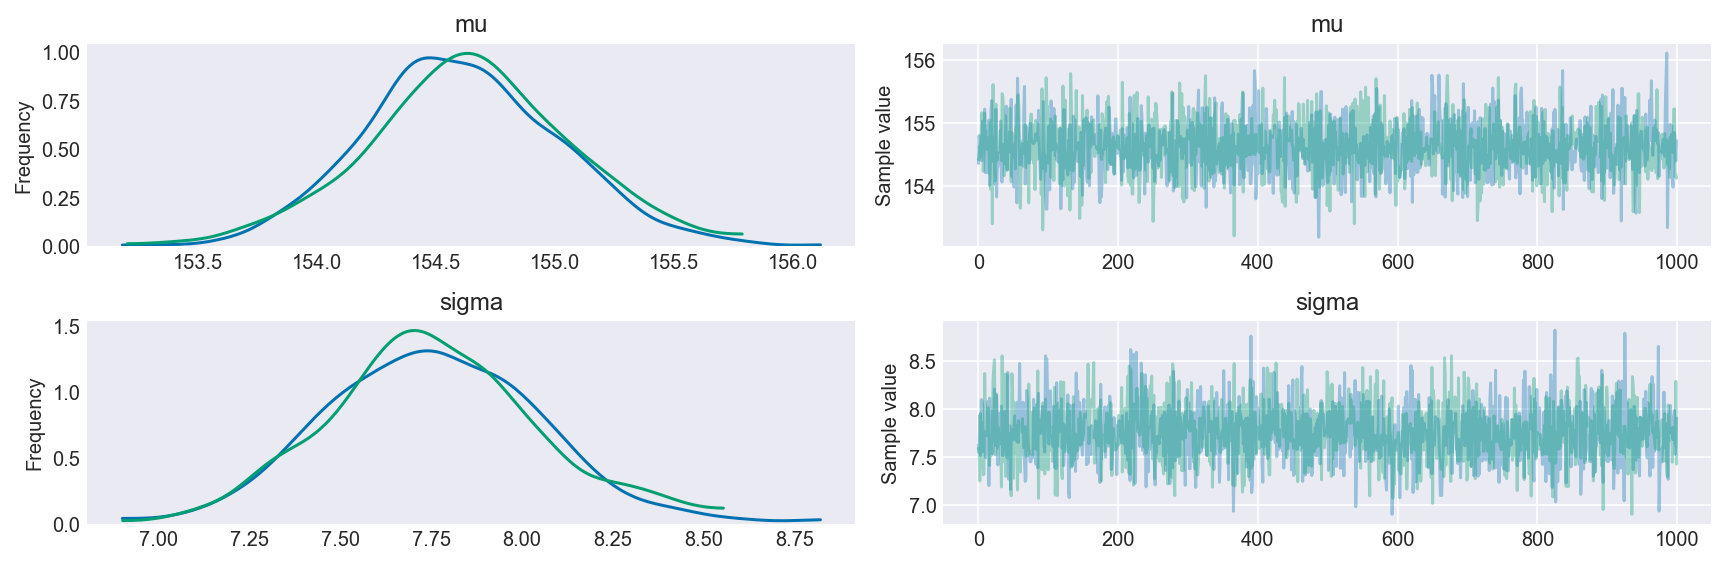

In [ ]:
pm.traceplot(trace_4_1_logsigma);

#### Code 4.37

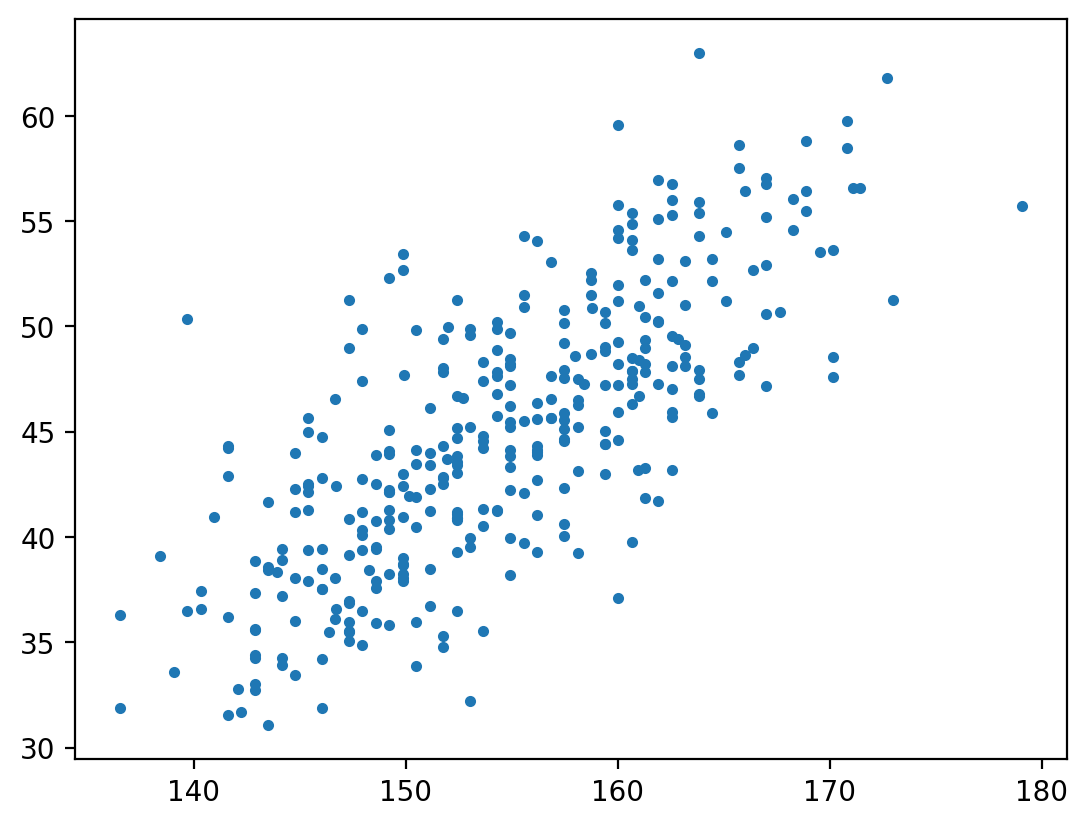

In [ ]:
plt.plot(d2.height, d2.weight, '.');

#### Code 4.38 and 4.39

Notice that the variable mu is defined as alpha + beta * d2.weight in a single line. If we want the trace to containt mu we can write as a deterministic varible. The computating will be exactly the same. The only diference is that mu will be accesible in the trace.

In [ ]:
with pm.Model() as m4_3:
    alpha = pm.Normal('alpha', mu=178, sigma=100)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * d2.weight
    #mu = pm.Deterministic('mu', alpha + beta * d2.weight) # try uncomenting this line and comenting the above line
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


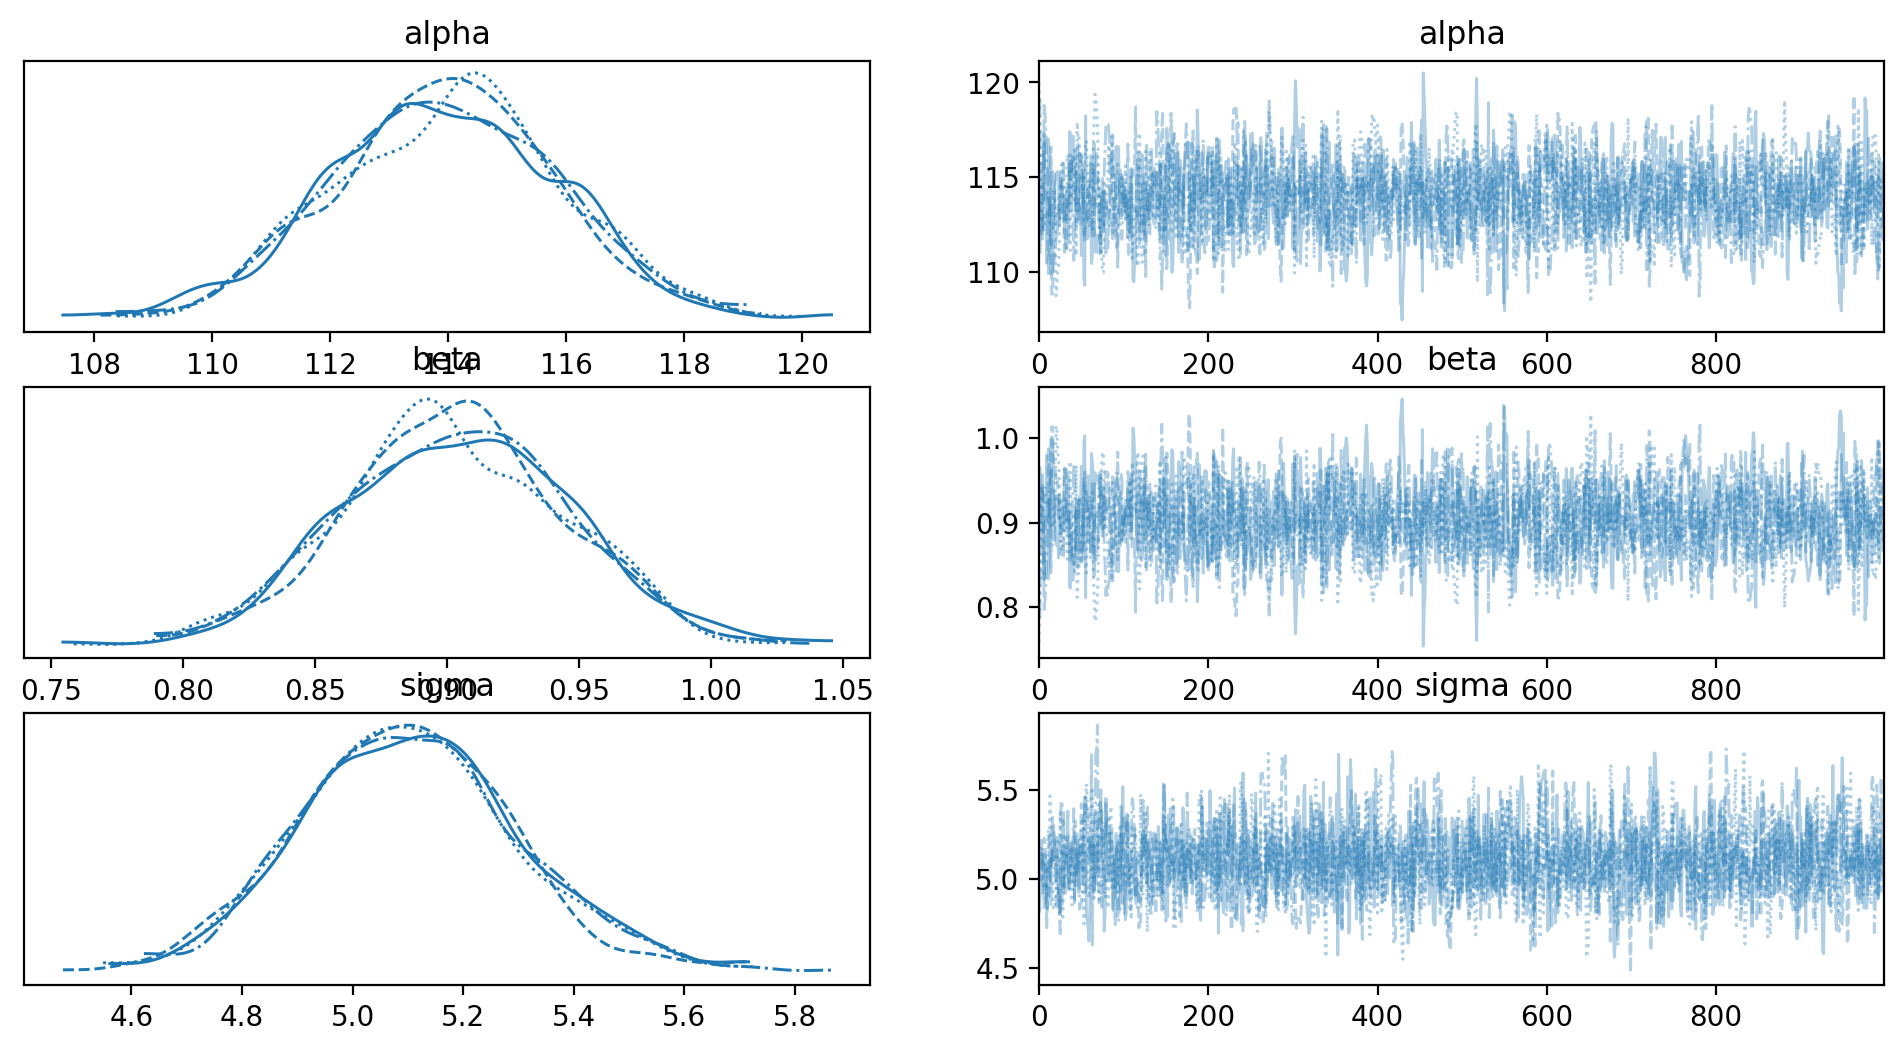

In [ ]:
az.plot_trace(trace_4_3);

Another alternative is to write mu inside the likelihood and not as a separate line.

    height = pm.Normal('height', mu=alpha + beta * d2.weight, sd=sigma, observed=d2.height)
    
Using PyMC3 there is not too much reason to do this. I personally think that defining mu in a separate lines improves readability.

#### Code 4.40

In [ ]:
pm.summary(trace_4_3, hdi_prob=.11).round(2)

mean    sd  hdi_44.5%  hdi_55.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha  113.96  1.91     113.92     114.42       0.05     0.04    1456.0   
beta     0.90  0.04       0.88       0.89       0.00     0.00    1454.0   
sigma    5.10  0.20       5.05       5.10       0.00     0.00    1970.0   

       ess_tail  r_hat  
alpha    1609.0    1.0  
beta     1609.0    1.0  
sigma    1956.0    1.0

#### Code 4.41

In [ ]:
trace_df = az.convert_to_dataset(trace_4_3)
trace_df

<xarray.Dataset> Size: 104kB
Dimensions:  (chain: 4, draw: 1000)
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    alpha    (chain, draw) float64 32kB 113.3 111.0 113.3 ... 112.5 113.0 111.8
    beta     (chain, draw) float64 32kB 0.9264 0.9651 0.9092 ... 0.934 0.959
    sigma    (chain, draw) float64 32kB 4.813 4.823 5.174 ... 5.387 5.438 5.235
Attributes:
    created_at:                 2024-04-08T02:21:18.278472+00:00
    arviz_version:              0.18.0
    inference_library:          pymc
    inference_library_version:  5.12.0
    sampling_time:              1.8658130168914795
    tuning_steps:               1000

#### Code 4.42

In [ ]:
d2 = d2.assign(weight_c=pd.Series(d2.weight - d2.weight.mean()))

#### Code 4.43

In [ ]:
with pm.Model() as m4_4:
    alpha = pm.Normal('alpha', mu=178, sigma=100)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * d2.weight_c
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_4 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


#### Code 4.44

In [ ]:
pm.summary(trace_4_4, hdi_prob=.11).round(2)

mean    sd  hdi_44.5%  hdi_55.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha  154.60  0.28     154.55     154.62        0.0      0.0    6261.0   
beta     0.91  0.04       0.91       0.92        0.0      0.0    5804.0   
sigma    5.11  0.19       5.09       5.14        0.0      0.0    6761.0   

       ess_tail  r_hat  
alpha    3326.0    1.0  
beta     3009.0    1.0  
sigma    3088.0    1.0

#### Code 4.45

Instead of using the MAP, we are going to use the mean of the posterior 

In [ ]:
# Assuming `idata` is your InferenceData object from a PyMC model named trace_4_4
idata = trace_4_4

# Obtain a summary of the model's parameters
summary = pm.summary(idata, kind='stats')

def get_covar_matrix(trace):
    # Extracting posterior samples for covariance matrix computation
    posterior_samples = idata.posterior

    # Assuming we are dealing with a multi-dimensional case, let's combine and flatten the samples
    # First, we need to stack all parameter samples into a single large array
    stacked_samples = np.array([posterior_samples[var].values.reshape(-1) for var in posterior_samples.data_vars])

    # Compute the covariance matrix from these samples
    var_cov_matrix = np.cov(stacked_samples)

    # Generate a list of variable names for labeling
    variable_names = list(posterior_samples.data_vars)

    # Create a DataFrame for the variance-covariance matrix with appropriate labels
    var_cov_df = pd.DataFrame(var_cov_matrix, index=variable_names, columns=variable_names).round(3
                                                                                                  )

    return var_cov_df

# Display the DataFrame for readability
trace_4_4_covar_matrix = get_covar_matrix(trace_4_4)


trace_4_4_covar_matrix

alpha   beta  sigma
alpha  0.077 -0.000  0.000
beta  -0.000  0.002  0.000
sigma  0.000  0.000  0.038

154.5949581213527
0.9062726327320106


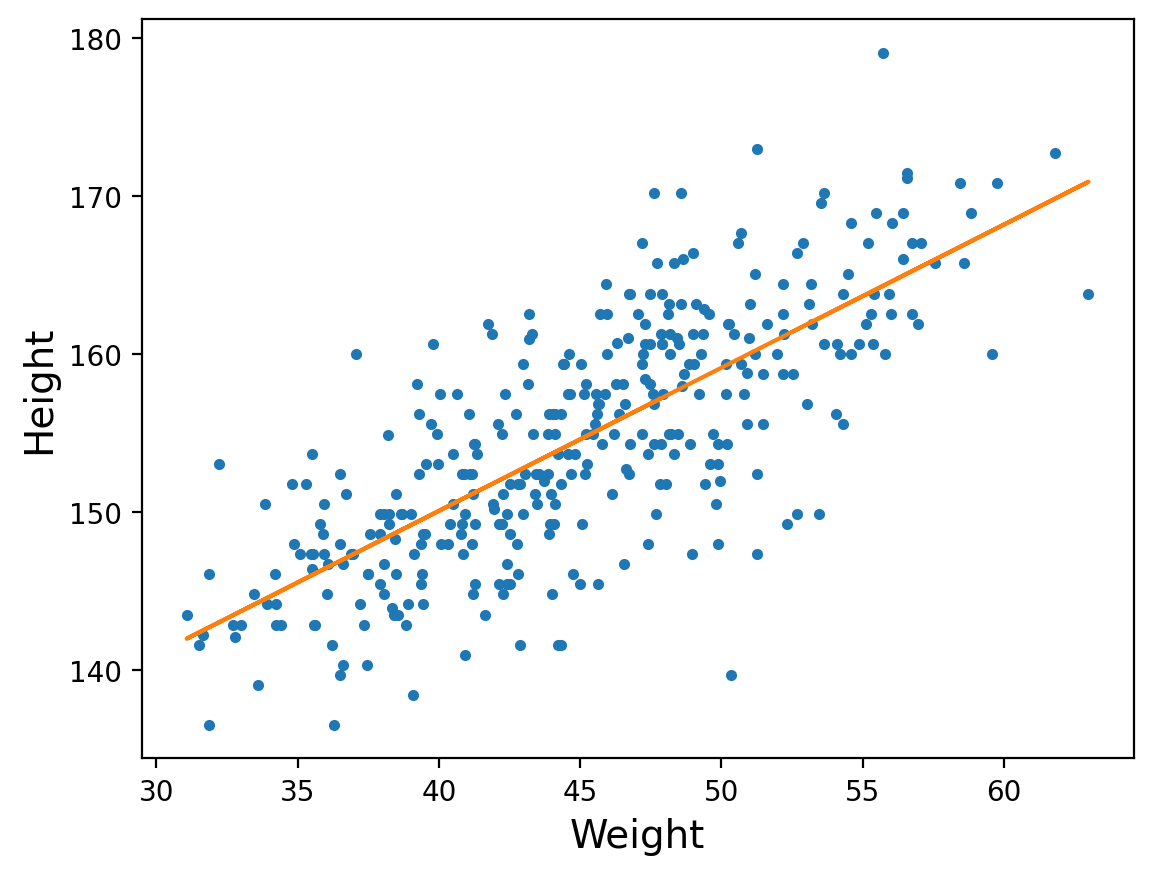

In [ ]:
# Assuming d2.weight is a numpy array or a pandas series
weights = np.asarray(d2.weight)  # This ensures d2.weight is in a compatible format
alpha_mean = trace_4_4.posterior['alpha'].mean().item()  # Ensuring it's a scalar
beta_mean = trace_4_4.posterior['beta'].mean().item()  # Ensuring it's a scalar

print(alpha_mean)
print(beta_mean)

# Calculate the linear model values
linear_model = alpha_mean + beta_mean * (weights - weights.mean())

# Plotting
plt.plot(d2.weight, d2.height, '.')  # Original data points
plt.plot(d2.weight, linear_model)  # Regression line
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Height', fontsize=14)
plt.show()

#### Code 4.46 and 4.47

In [ ]:
import numpy as np

# Assuming you want to randomly select 5 samples
num_samples = 5

# Identify the correct number of draws; assuming 'draw' is the correct dimension name
num_draws = trace_4_4.posterior.draw.size
random_indices = np.random.choice(num_draws, size=num_samples, replace=False)

# Adjusting the extraction process to fit the 2-dimensional structure
# This assumes [chain, draw] structure; adjust as necessary for your data's organization
alpha_samples = trace_4_4.posterior['alpha'].values[:1, random_indices]
beta_samples = trace_4_4.posterior['beta'].values[:1, random_indices]
sigma_samples = trace_4_4.posterior['sigma'].values[:1, random_indices]

# Displaying the sampled values
print("Alpha Samples:", alpha_samples)
print("Beta Samples:", beta_samples)
print("Sigma Samples:", sigma_samples)


Alpha Samples: [[154.69282741 154.83426899 154.25840915 154.28533474 154.47401029]]
Beta Samples: [[0.85783271 0.88234072 0.9355272  0.90964099 0.93134534]]
Sigma Samples: [[5.13815144 4.89322293 4.92425738 5.30270322 5.13859126]]


#### Code 4.48

In [ ]:
N = [10, 50, 150, 352][1]
with pm.Model() as m_N:
    alpha = pm.Normal('alpha', mu=178, sigma=100)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta * d2.weight[:N])
    height_hat = pm.Normal('height_hat', mu=mu, sigma=sigma, observed=d2.height[:N])
    trace_N = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


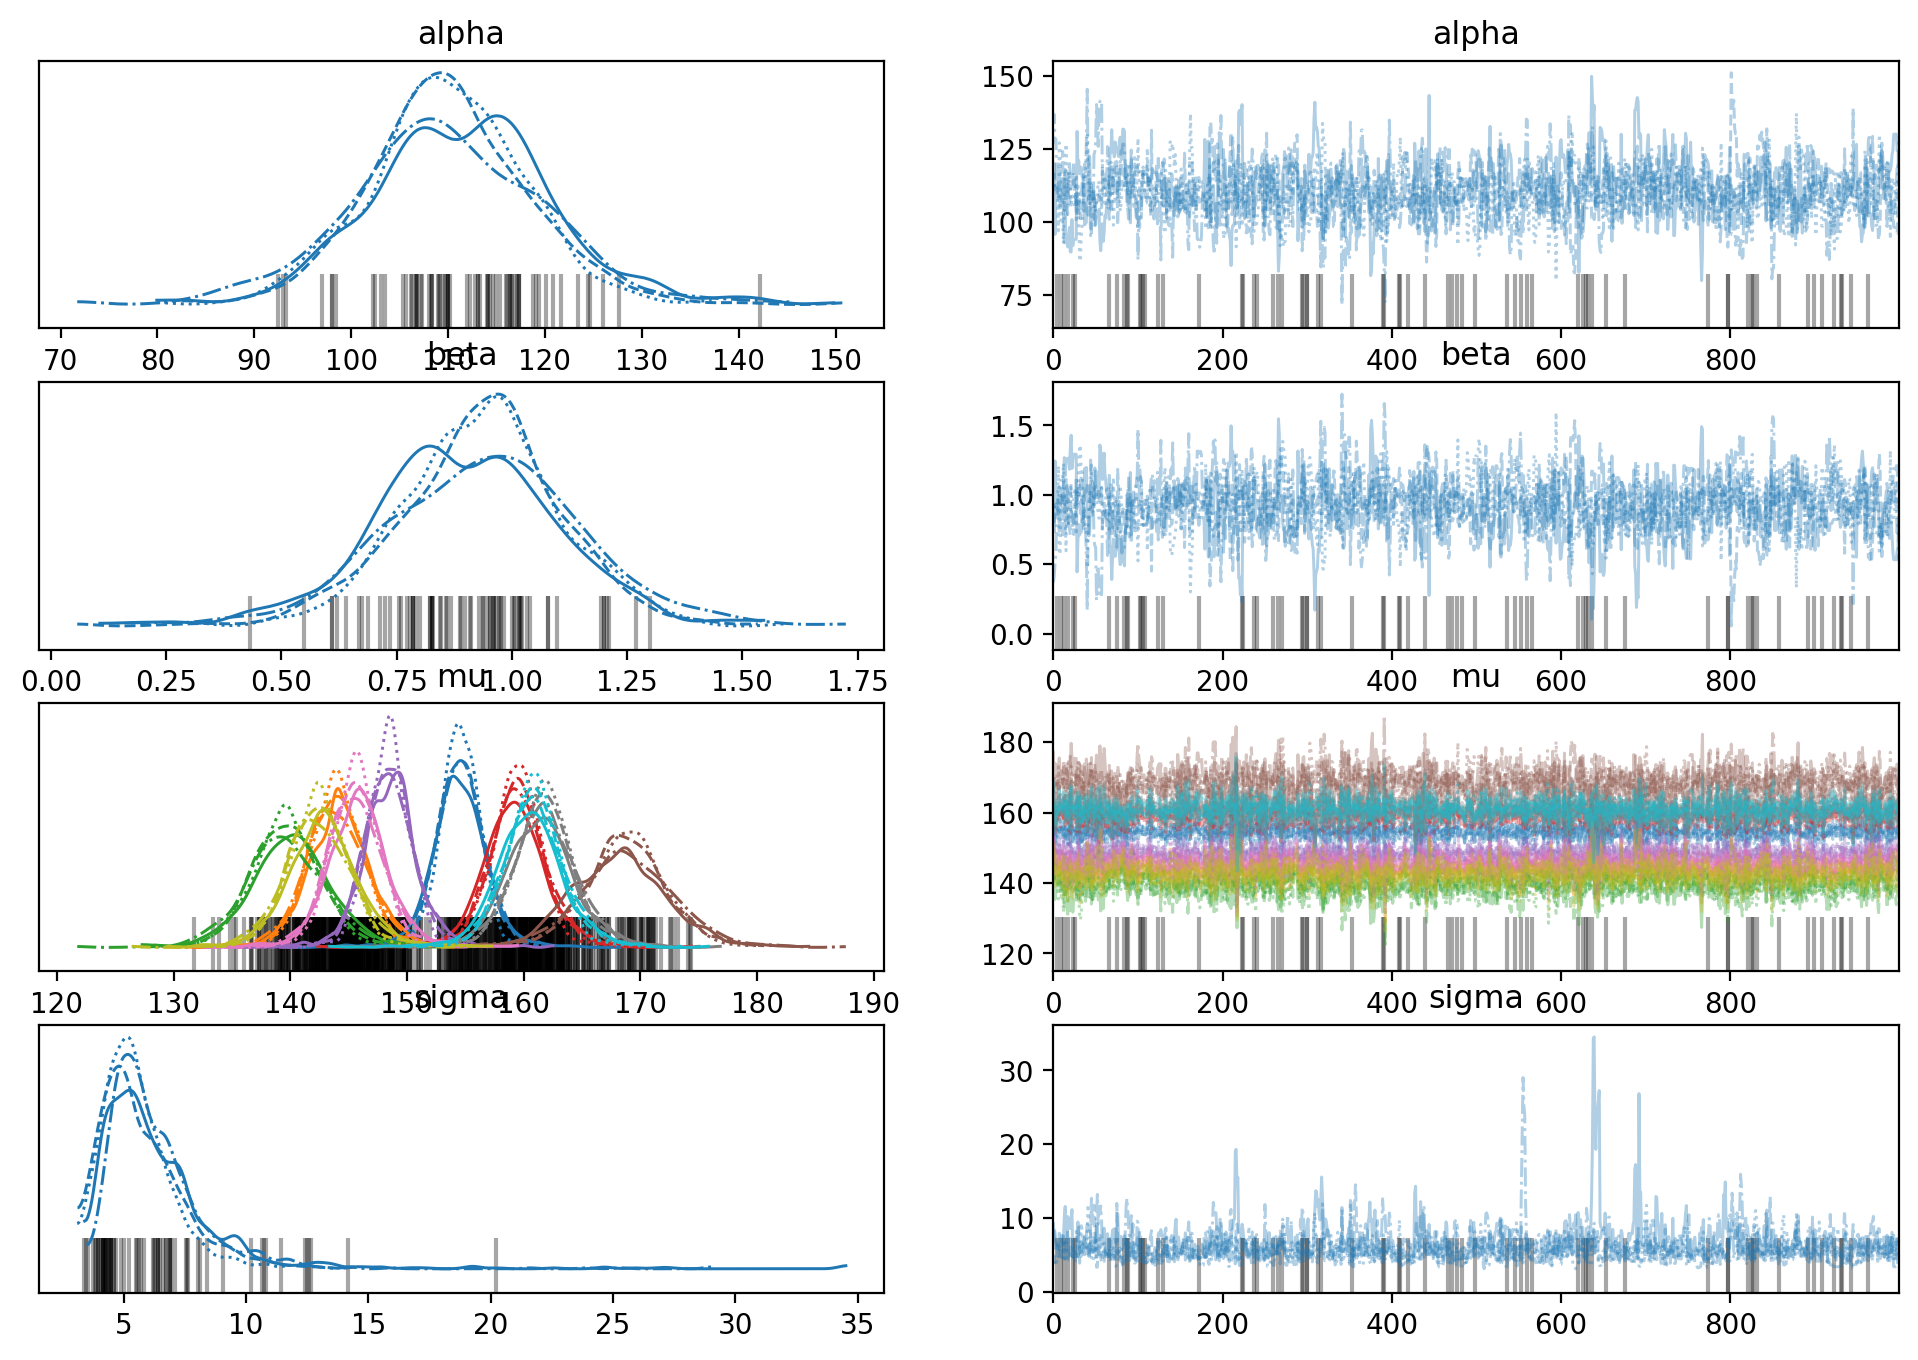

In [ ]:
chain_N = trace_N
az.plot_trace(chain_N);

#### Code 4.49

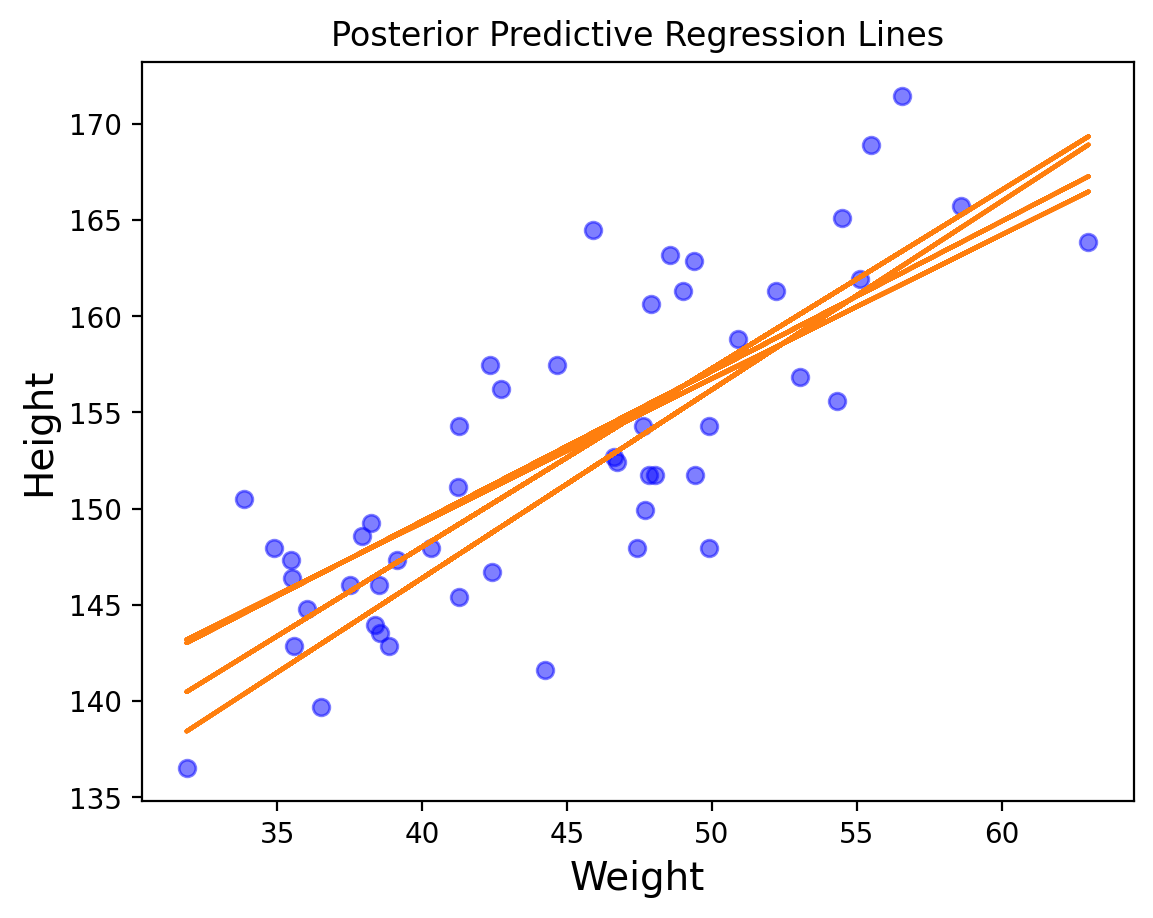

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

# Assuming `d2` is a DataFrame containing 'weight' and 'height',
# and `trace_N` is the trace from your PyMC model sampling

# Extracting posterior samples for plotting
post_alpha = az.summary(trace_N, var_names=["alpha"])["mean"].values[0]
post_beta = az.summary(trace_N, var_names=["beta"])["mean"].values[0]

# Plot original data
plt.scatter(d2.weight[:N], d2.height[:N], c='blue', alpha=0.5)

# Plot regression lines based on posterior samples
for _ in range(100):  # Drawing 100 lines
    idx = np.random.randint(0, len(trace_N.posterior['alpha']))
    alpha_sample = trace_N.posterior['alpha'][idx]
    beta_sample = trace_N.posterior['beta'][idx]
    y = alpha_sample.values[idx] + beta_sample.values[idx] * d2.weight[:N]
    plt.plot(d2.weight[:N], y, 'C1-', alpha=0.5, zorder=1)

plt.xlabel('Weight', fontsize=14)
plt.ylabel('Height', fontsize=14)
plt.title('Posterior Predictive Regression Lines')
plt.show()


ValueError: operands could not be broadcast together with shapes (1000,) (10,) 

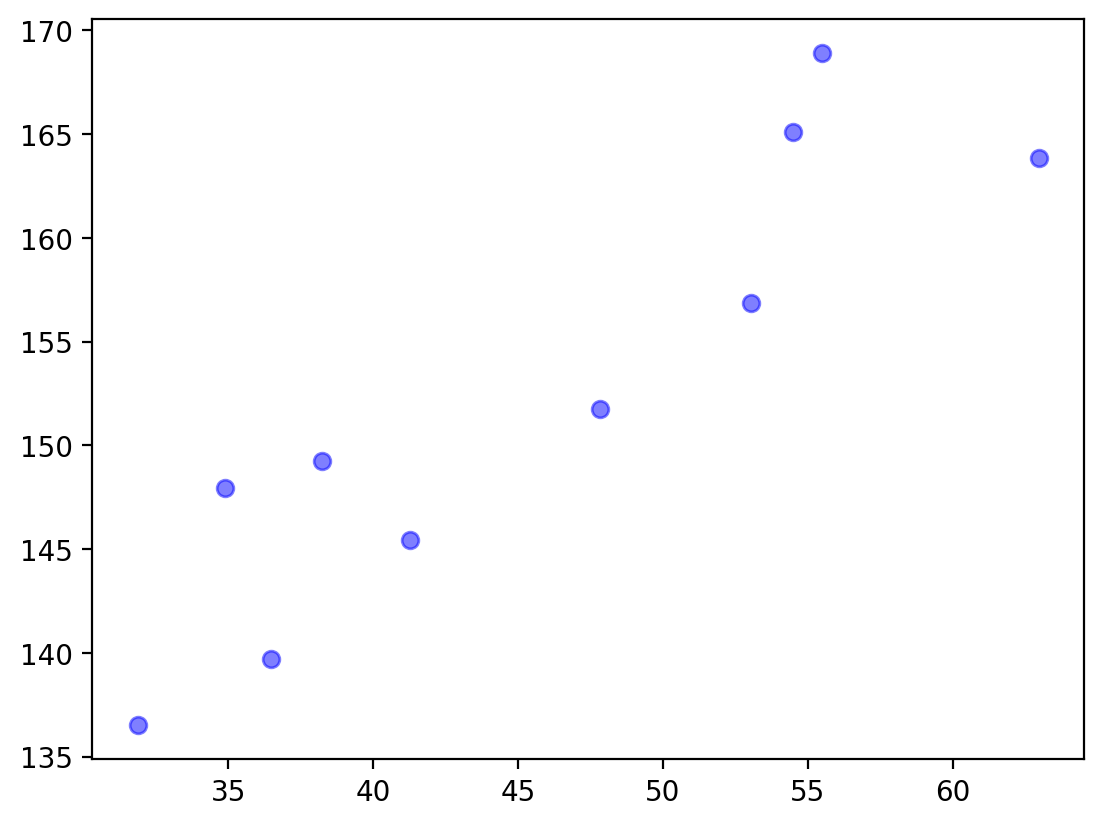

In [ ]:
plt.plot(d2.weight[:N], d2.height[:N], 'C0o')
for _ in range(0, 20):
    idx = np.random.randint(len(chain_N))
    print(idx)
    plt.plot(d2.weight[:N], chain_N.posterior['alpha'].values[:,idx] + chain_N.posterior['beta'].values[:,idx] * d2.weight[1], 'C2-', alpha=0.5)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

Alternative we can directly use the deterministic mu variable

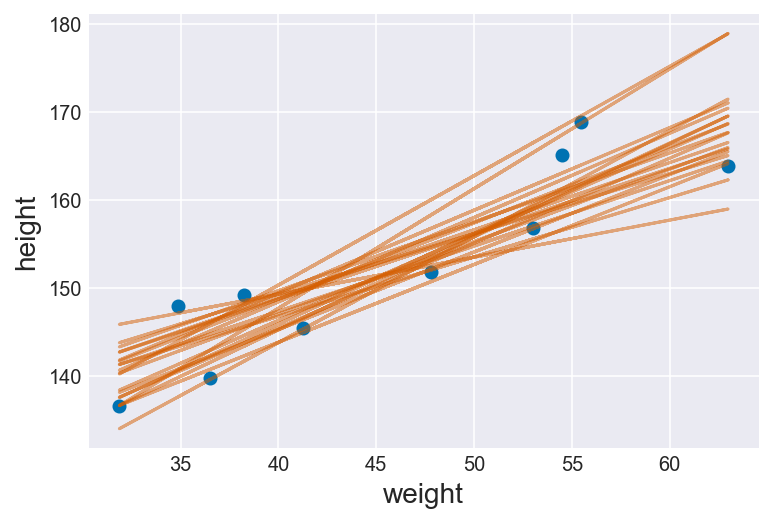

In [ ]:
plt.plot(d2.weight[:N], d2.height[:N], 'C0o')
for _ in range(0, 20):
    idx = np.random.randint(len(chain_N))
    plt.plot(d2.weight[:N], chain_N['mu'][idx], 'C2-', alpha=0.5)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.50 and 4.51

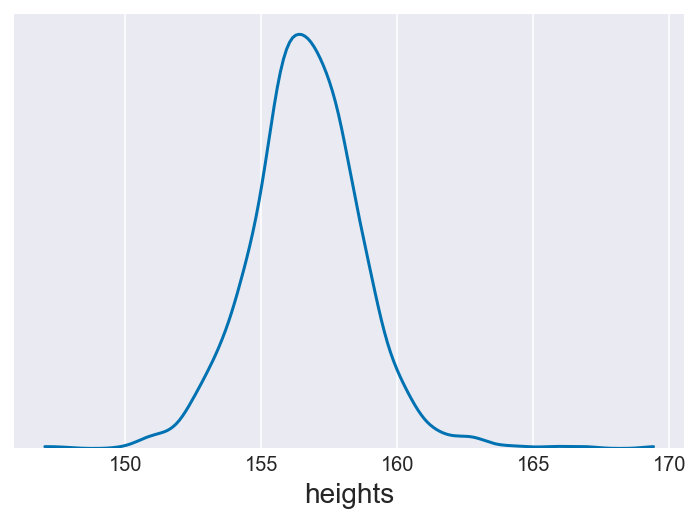

In [ ]:
mu_at_50 = chain_N['alpha'] + chain_N['beta'] * 50
az.plot_kde(mu_at_50)
plt.xlabel('heights', fontsize=14)
plt.yticks([]);

#### Code 4.52

In [ ]:
pm.hpd(mu_at_50, alpha=.11)

array([ 153.36045406,  159.60493185])

#### Code 4.53

Using PyMC3, we do not need to compute anything else. By defining a deterministic variable mu in the model, we add that variable to the trace. Thus we get a matrix with row samples from the posterior and columns values of weights. We can access this matrix directly from the trace or turn it into a DataFrame, it all depends on what we need.

In [ ]:
df_trace_N = pm.trace_to_dataframe(chain_N).filter(regex=('mu.*'))
df_trace_N.head()

mu__0       mu__1       mu__2       mu__3       mu__4       mu__5  \
0  155.209354  144.034259  139.480408  160.349898  148.755737  170.156044   
1  154.334418  143.469248  139.041692  159.332396  148.059782  168.866582   
2  154.844252  142.188852  137.031776  160.665736  147.535758  171.770849   
3  155.023345  140.512205  134.598915  161.698470  146.643162  174.431996   
4  153.442479  139.729380  134.141293  159.750504  145.523164  171.783748   

        mu__6       mu__7       mu__8       mu__9  
0  145.766399  162.752544  142.441808  161.774723  
1  145.153350  161.668407  141.920962  160.717705  
2  144.150439  163.386647  140.385457  162.279299  
3  142.761432  164.818365  138.444367  163.548640  
4  141.854911  162.698820  137.775264  161.498924

#### Code 4.54 and 4.58

We are doing _manually_, what in thebook is done using the ```link``` function. In the book on code 4.58 the following operations are performed _manually_.

In [ ]:
weigth_seq = np.arange(25, 71)
# Given that we have a lot of samples we can use less of them for plotting (or we can use all!)
chain_N_thinned = chain_N[::10]
mu_pred = np.zeros((len(weigth_seq), len(chain_N_thinned)*chain_N.nchains))
for i, w in enumerate(weigth_seq):
    mu_pred[i] = chain_N_thinned['alpha'] + chain_N_thinned['beta'] * w

#### Code 4.55

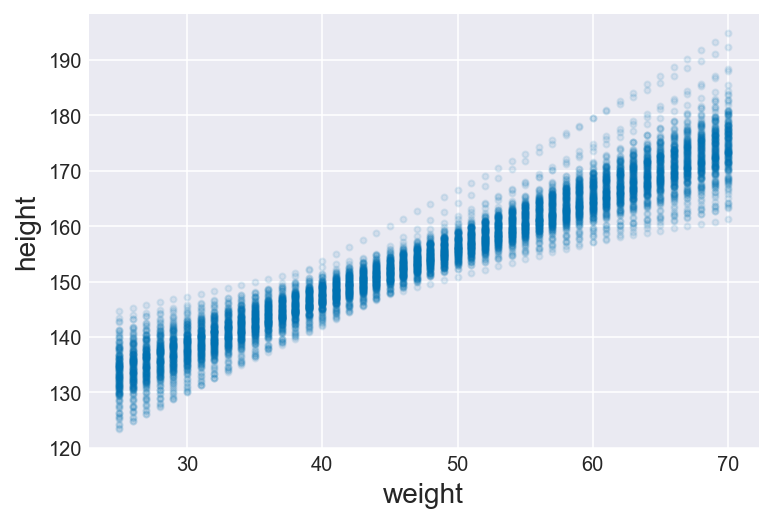

In [ ]:
plt.plot(weigth_seq, mu_pred, 'C0.', alpha=0.1)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14);

#### Code 4.56

In [ ]:
mu_mean = mu_pred.mean(1)
mu_hpd = pm.hpd(mu_pred.T, alpha=.11)

#### Code 4.57

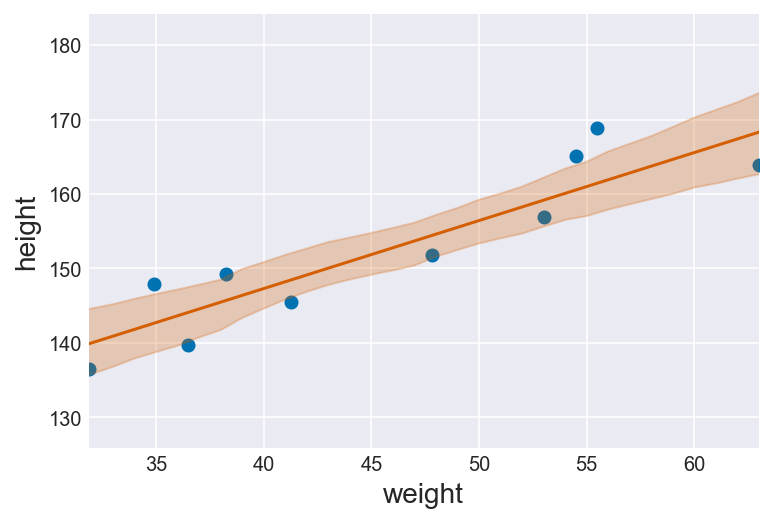

In [ ]:
plt.scatter(d2.weight[:N], d2.height[:N])
plt.plot(weigth_seq, mu_mean, 'C2')
plt.fill_between(weigth_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight[:N].min(), d2.weight[:N].max());

#### Code 4.59

Now we are going to use ```sample_ppc()``` from PyCM3. This function give us posterior predictive samples, that is for each value of the input variable we get the a sample (from the posterior) of the output variable. Thus in the following example the shape of height_pred['height_hat'].shape is (200, 352)

In [ ]:
height_pred = pm.sample_ppc(chain_N, 200, m_N)

100%|██████████| 200/200 [00:00<00:00, 356.45it/s]


#### Code 4.60

In [ ]:
height_pred_hpd = pm.hpd(height_pred['height_hat'])

#### Code 4.61
```sample_ppc``` returns values corresponding to the input values (weights in this example). Because the weights are not ordered if we use them with the ```fill_between``` function we will get a mess. For that reason in the following cell we order the weights and the predicted heights

In [ ]:
idx = np.argsort(d2.weight.values[:N])
d2_weight_ord = d2.weight.values[:N][idx]
height_pred_hpd = height_pred_hpd[idx]

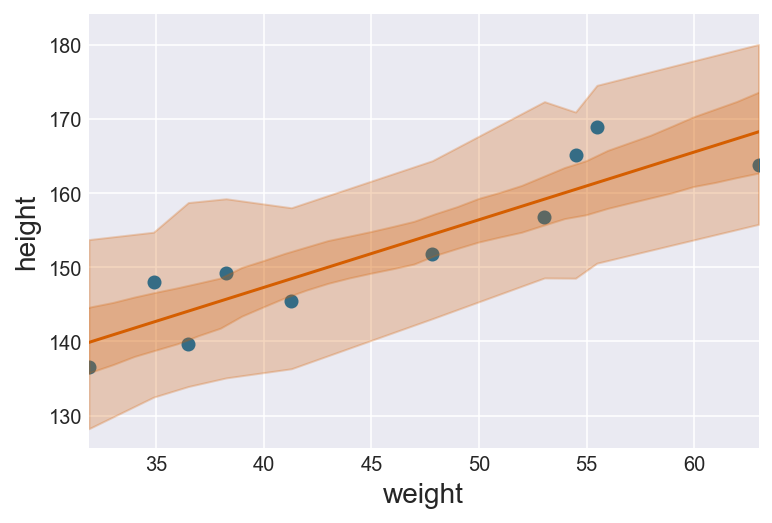

In [ ]:
plt.scatter(d2.weight[:N], d2.height[:N])
plt.fill_between(weigth_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(d2_weight_ord, height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25)
plt.plot(weigth_seq, mu_mean, 'C2')
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight[:N].min(), d2.weight[:N].max());

#### Code 4.62

Change the number of samples used in 4.59 (200) to other values. Because we are getting samples at the input values the jaggedness of this plot is larger than the one in the book.

#### Code 4.63

Now we are going to generate heights from the posterior _manually_, instead of restricting to the input values we are going to pass an array of equally spaced weights values ```weight_seg```.

In [ ]:
weigth_seq = np.arange(25, 71)
post_samples = []
for _ in range(1000): # number of samples from the posterior
    i = np.random.randint(len(chain_N))
    mu_pred = chain_N['alpha'][i] + chain_N['beta'][i] * weigth_seq
    sigma_pred = chain_N['sigma'][i]
    post_samples.append(np.random.normal(mu_pred, sigma_pred))

In [ ]:
post_samples_hpd = pm.hpd(np.array(post_samples))

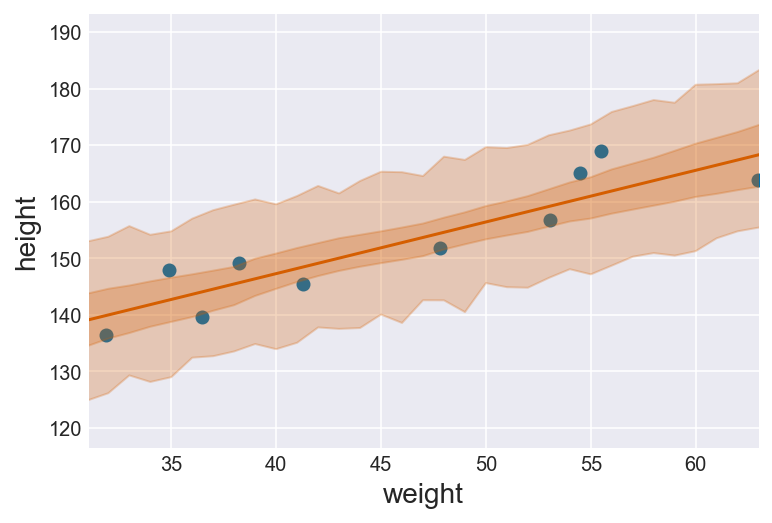

In [ ]:
plt.scatter(d2.weight[:N], d2.height[:N])
plt.plot(weigth_seq, mu_mean, 'C2')
plt.fill_between(weigth_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(weigth_seq, post_samples_hpd[:,0], post_samples_hpd[:,1], color='C2', alpha=0.25)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight.min(), d2.weight.max());

#### Code 4.64

We have already loaded this dataset, check code 4.7 and 4.8.

In [ ]:
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

#### Code 4.65

In [ ]:
d.weight_std = (d.weight - d.weight.mean()) / d.weight.std()
d.weight_std2 = d.weight_std**2

#### Code 4.66

In [ ]:
with pm.Model() as m_4_5:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta[0] * d.weight_std + beta[1] * d.weight_std2)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d.height)
    trace_4_5 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:04<00:00, 451.83it/s]


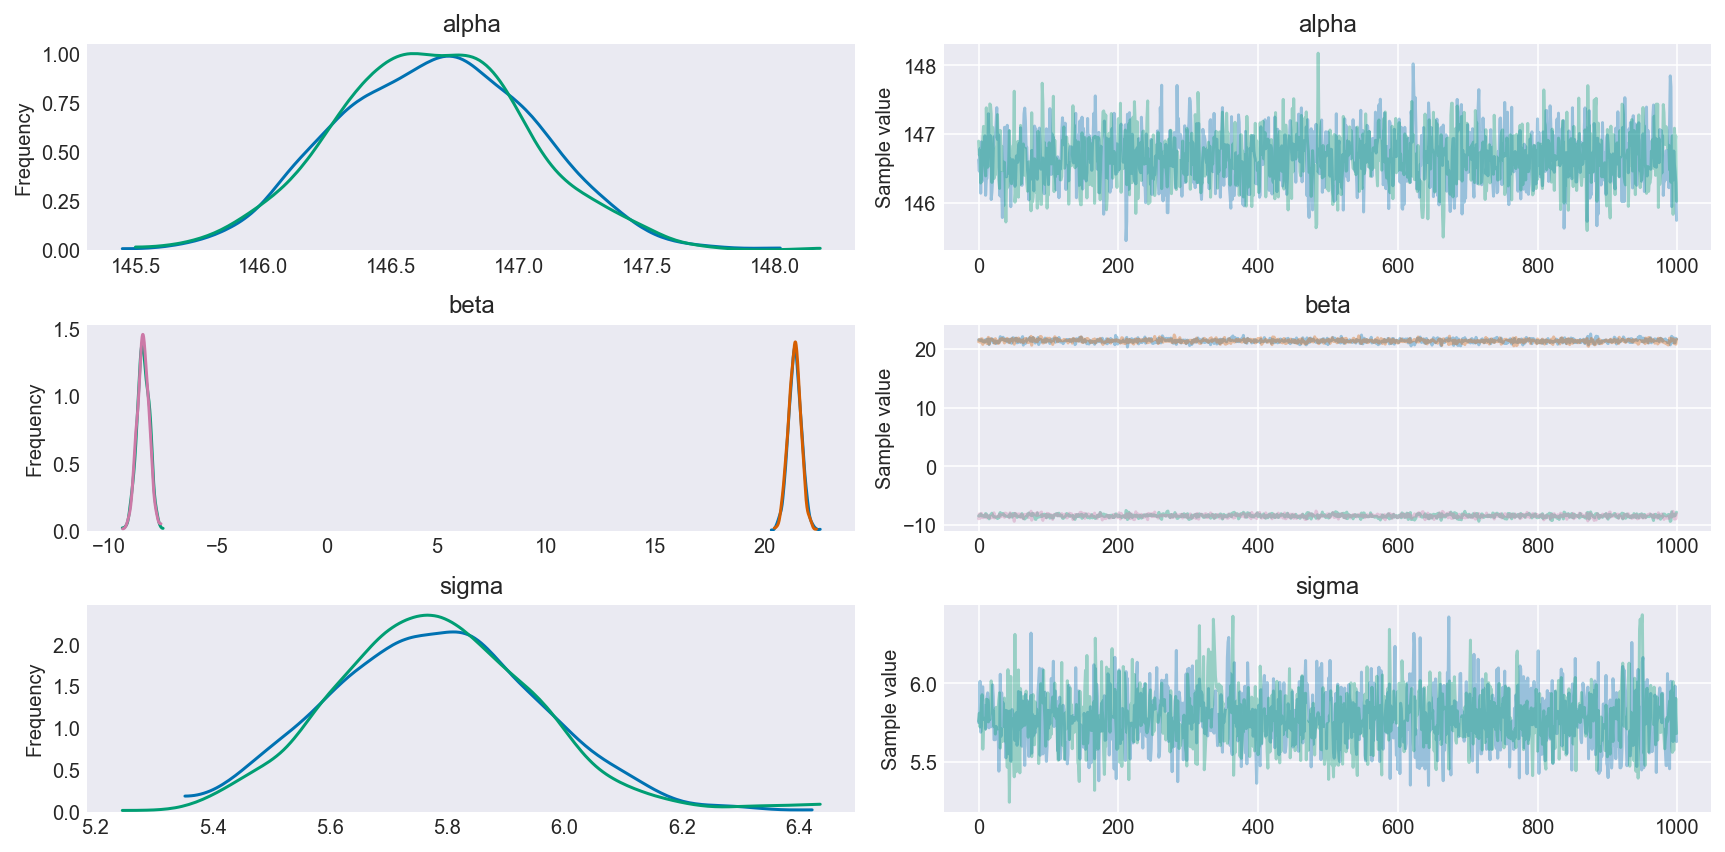

In [ ]:
varnames = ['alpha', 'beta', 'sigma']
pm.traceplot(trace_4_5, varnames);

#### Code 4.67

In [ ]:
pm.summary(trace_4_5, varnames, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5   n_eff  Rhat
alpha    146.66  0.37      0.01   146.05    147.24  1428.0   1.0
beta__0   21.40  0.30      0.01    20.91     21.84  1497.0   1.0
beta__1   -8.42  0.28      0.01    -8.89     -8.01  1291.0   1.0
sigma      5.78  0.17      0.00     5.48      6.02  1501.0   1.0

#### Code 4.68

In [ ]:
mu_pred = trace_4_5['mu']
idx = np.argsort(d.weight_std)
mu_hpd = pm.hpd(mu_pred, alpha=.11)[idx]

height_pred = pm.sample_ppc(trace_4_5, 200, m_4_5)
height_pred_hpd = pm.hpd(height_pred['height'], alpha=.11)[idx]



NameError: name 'trace_4_5' is not defined

#### Code 4.69

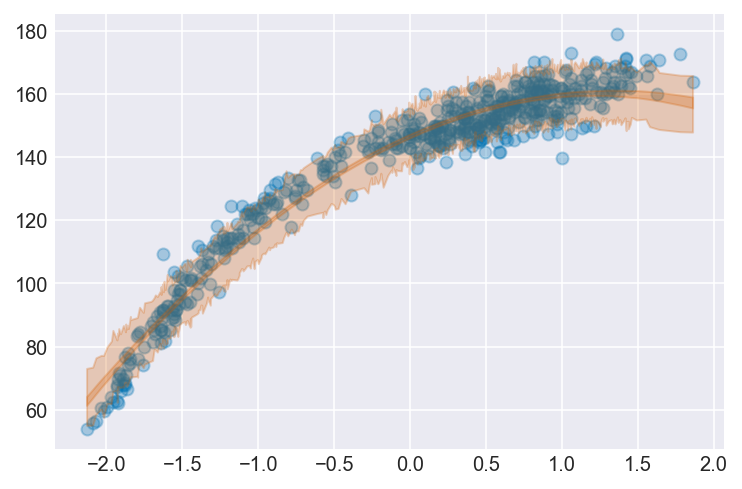

In [ ]:
plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3)
plt.fill_between(d.weight_std[idx], mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25);
plt.fill_between(d.weight_std[idx], height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25);

#### Code 4.70

We will stack the weights to get a 2D array, these simplifies wrriting a model. Now we can compute the dot product between beta and the 2D-array

In [ ]:
weight_m = np.vstack((d.weight_std, d.weight_std**2, d.weight_std**3))

In [ ]:
with pm.Model() as m_4_6:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10, shape=3)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + pm.math.dot(beta, weight_m))
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d.height)
    trace_4_6 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:16<00:00, 336.64it/s]


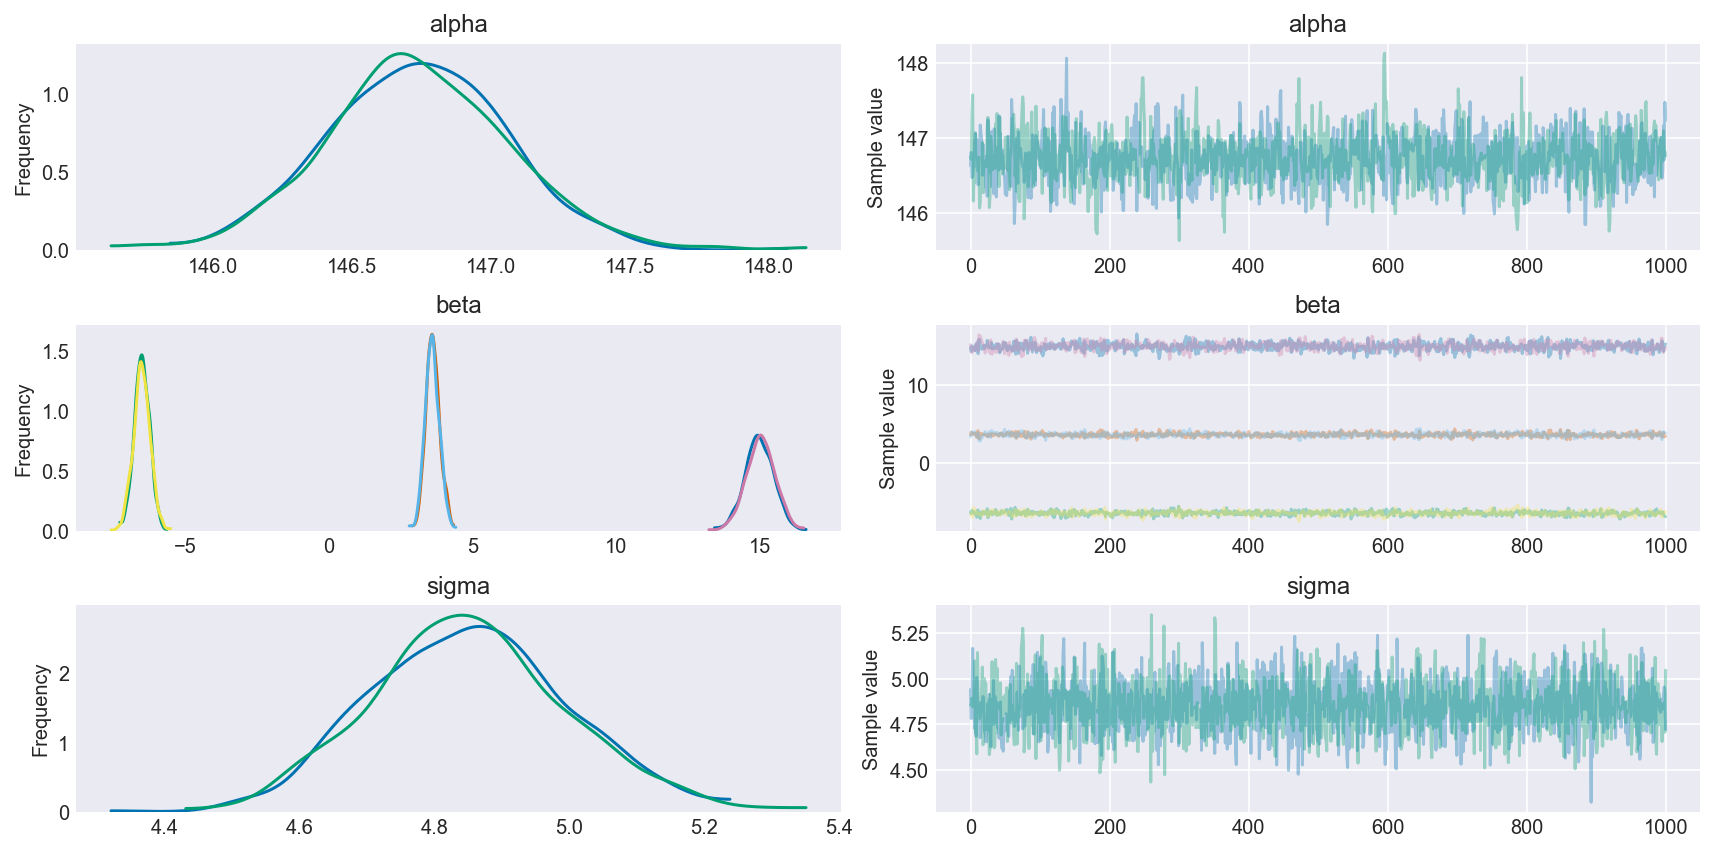

In [ ]:
pm.traceplot(trace_4_6, varnames);

#### Code 4.71 and 4.72

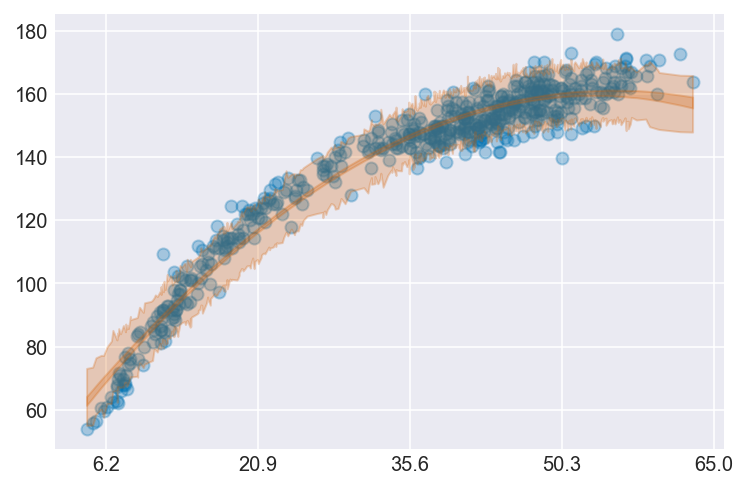

In [ ]:
plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3)
plt.fill_between(d.weight_std[idx], mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25);
plt.fill_between(d.weight_std[idx], height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25)

at = np.arange(-2, 3)
plt.xticks(at, np.round(at * d.weight.std() + d.weight.mean(), 1));

In [ ]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.6.2
IPython 6.1.0
PyMC3 3.2
NumPy 1.13.3
Pandas 0.20.3
SciPy 0.19.1
Matplotlib 2.1.0

